**Objective**: Understanding and replicating some of the stylized facts.

**Definition:**
Stylized facts are recurring and empirically observed patterns in various financial markets that provide valuable insights into the behavior and characteristics of these markets. These patterns represent common features or regularities in financial market data and behavior that can be documented and analyzed. Stylized facts are not theoretical models or hypotheses; instead, they are descriptive observations derived from data and empirical research.

Given a data for 300 NASDAQ stock of past 3 years we tried to implement all the stlyized facts.

**1. Absence of autocorrelations:** It means that the past performance of an asset, such as a stock or a market index, does not have a strong predictive effect on its future performance.
This stylized fact is important because it challenges the notion of predictability in financial markets.

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import math
from datetime import datetime
from statsmodels.graphics.tsaplots import plot_acf
import plotly.express as px
import statsmodels.api as sm

In [ ]:
df = pd.read_excel("Dataset.xlsx")

In [ ]:
df.drop(df.columns[0], axis = 1, inplace = True)
df = df.transpose()
df.columns = df.iloc[0]
df = df[1:]

In [ ]:
df.index.names = ['Date']
df.columns.names = ['Stock Identifiers']

In [ ]:
for i in df.index.tolist():
    df = df.rename(index={i: datetime.strptime(str(i), '%Y%m%d').date()})

In [ ]:
df.head()

Stock Identifiers  10107.0  14593.0    84788.0    14542.0  13407.0    90319.0  \
Date                                                                            
2015-01-02          46.760   109.33  308.51999  524.81000   78.450  529.54999   
2015-01-05          46.325   106.25  302.19000  513.87000   77.190  519.46002   
2015-01-06          45.650   106.26  295.29001  501.95999   76.150  506.64001   
2015-01-07          46.230   107.75  298.42001  501.10001   76.150  505.14999   
2015-01-08          47.590   111.89  300.45999  502.67999   78.175  506.91000   

Stock Identifiers  59328.0  76076.0  13856.0  89525.0  ...  88343.0  80329.0  \
Date                                                   ...                     
2015-01-02           36.36    27.61    94.44    57.35  ...    45.78    11.10   
2015-01-05           35.95    27.06    93.73    55.96  ...    44.55    10.82   
2015-01-06           35.28    27.05    93.02    55.23  ...    43.51    10.47   
2015-01-07           36.02    27.30    95.74    55.18  ...    44.04    10.89   
2015-01-08           36.69    27.51    97.48    56.38  ...    44.82    11.09   

Stock Identifiers  27684.0  88439.0  78981.0  15065.0  81917.0  79824.0  \
Date                                                                      
2015-01-02           42.80    13.10    72.08    27.48    31.45    29.53   
2015-01-05           42.26    12.66    69.49    33.79    31.37    28.67   
2015-01-06           41.10    12.24    68.81    35.06    31.39    27.73   
2015-01-07           41.36    12.39    68.47    36.23    31.55    27.53   
2015-01-08           42.34    12.58    69.19    35.22    32.10    27.51   

Stock Identifiers  90805.0  93179.0  
Date                                 
2015-01-02           34.48    31.66  
2015-01-05           33.06    30.81  
2015-01-06           31.98    31.26  
2015-01-07           32.21    32.12  
2015-01-08           32.47    33.12  

[5 rows x 300 columns]

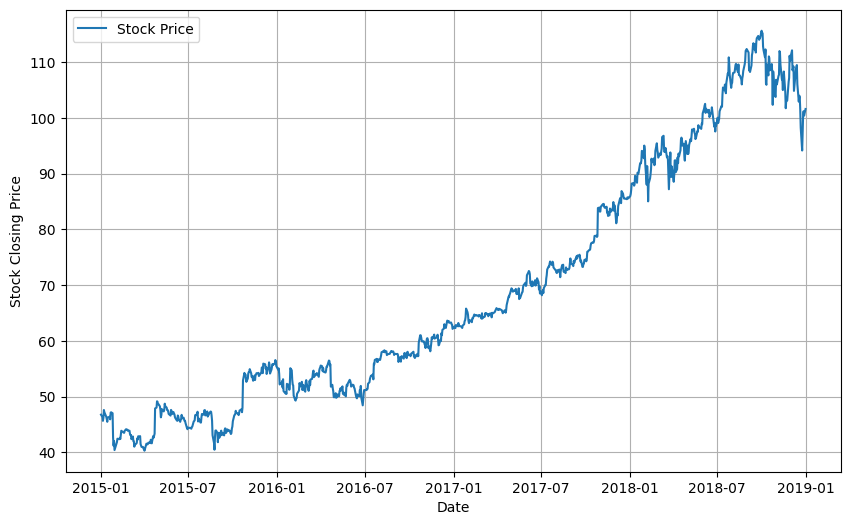

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(df.index,df.iloc[:,0],label='Stock Price')
plt.grid()
plt.xlabel('Date')
plt.ylabel('Stock Closing Price')
plt.legend()
plt.show()

In [ ]:
def stock_returns(df,a):
  t=1
  returns=[]
  l=len(df)
  for i in range(0,l-1):
    returns.append(math.log(df.iloc[i+1,a])-math.log(df.iloc[i,a]))
  x=df.index[0:l-1]
  plt.figure(figsize=(16,8))
  plots=plt.plot(x,returns,'b')
  plt.xlabel('Date')
  plt.ylabel('returns')
  plt.grid()
  plt.show()
  return(returns)

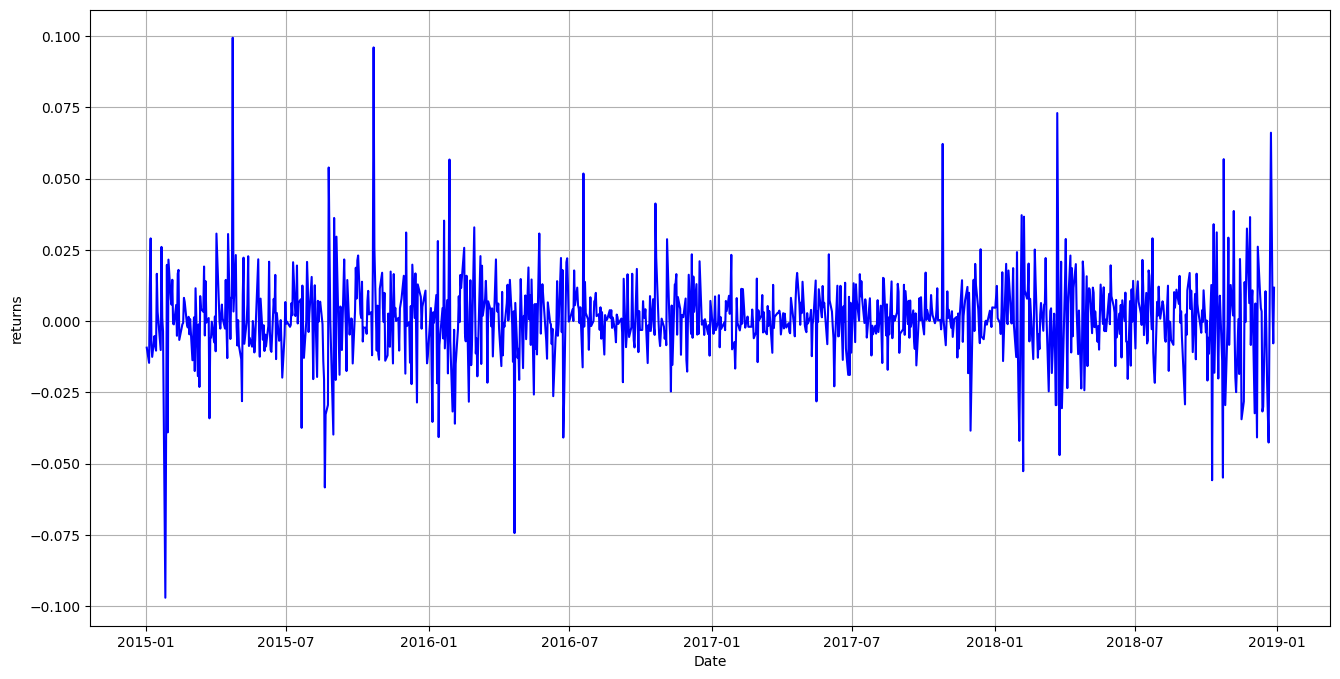

In [ ]:
returns=pd.Series(stock_returns(df,0))

In [ ]:
autocorrelation_values = []
for lag in range(1, 500):
    autocorr = returns.autocorr(lag=lag)
    autocorrelation_values.append((lag, autocorr))

autocorrelation_df = pd.DataFrame(autocorrelation_values, columns=['Lag', 'Autocorrelation'])

In [ ]:
autocorrelation_df.head()

Lag  Autocorrelation
0    1        -0.060901
1    2        -0.048033
2    3         0.018503
3    4        -0.027825
4    5        -0.058161

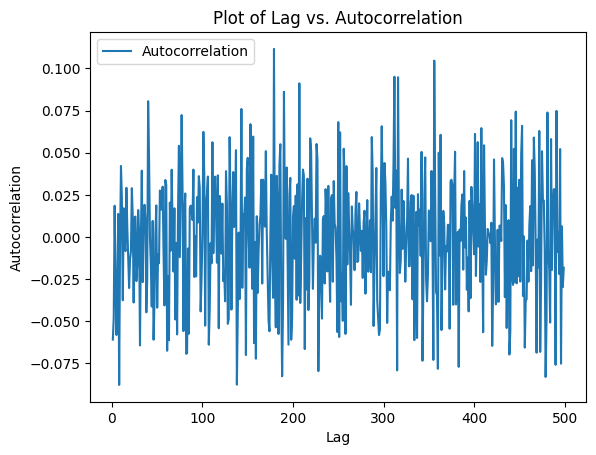

In [ ]:
autocorrelation_df.plot(x='Lag', y='Autocorrelation', kind='line')
plt.title('Plot of Lag vs. Autocorrelation')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')

plt.show()

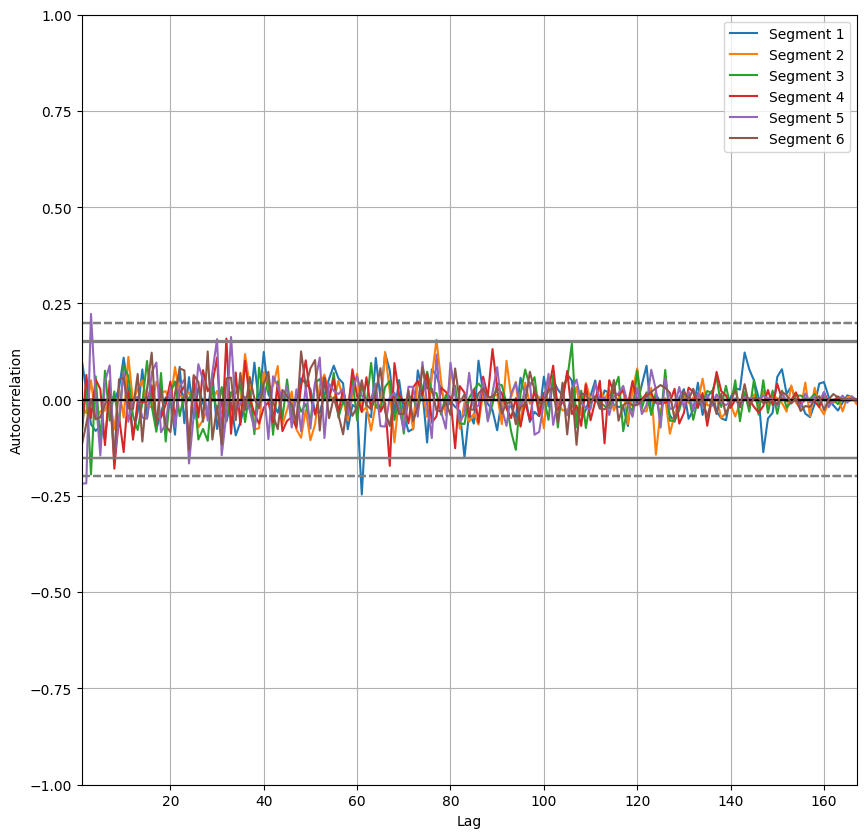

In [ ]:
l=len(df)
plt.figure(figsize=(10,10))
x1 = pd.plotting.autocorrelation_plot(returns[0:l//6],label=('Segment 1'))
x2 = pd.plotting.autocorrelation_plot(returns[l//6:2*l//6],label=('Segment 2'))
x3 = pd.plotting.autocorrelation_plot(returns[2*l//6:3*l//6],label=('Segment 3'))
x4 = pd.plotting.autocorrelation_plot(returns[3*l//6:4*l//6],label=('Segment 4'))
x5 = pd.plotting.autocorrelation_plot(returns[4*l//6:5*l//6],label=('Segment 5'))
x6 = pd.plotting.autocorrelation_plot(returns[5*l//6:l],label=('Segment 6'))

plt.grid()

plt.legend(loc='upper right')

plt.show()

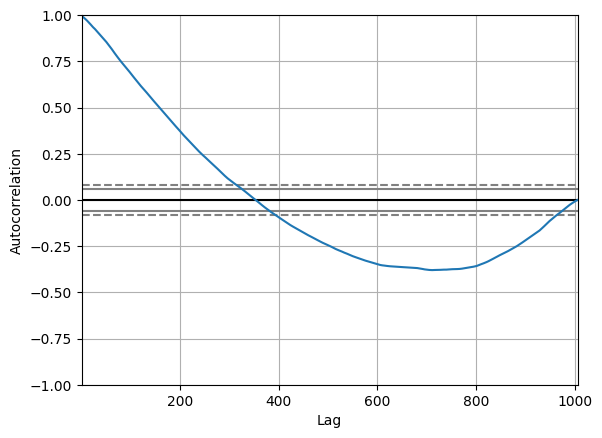

In [ ]:
x = pd.plotting.autocorrelation_plot(df.iloc[0:,0])
x.plot()
plt.show()

**LjungBox Test** : Test to check autocorrelation

In [ ]:
sm.stats.acorr_ljungbox(returns[:], lags=[1], return_df=True)

lb_stat  lb_pvalue
1  3.735088   0.053281

If pvalue>0.05 , the returns of the given stock lack autocorrelation and if pvalue< 0.05, the returns of the given stock show autocorrelation. In an efficient market, returns lack autocorrelation.

Thus from the plots of autocorrelation for different time lags and smaller chunks of interval and verifying with the statistic test it indicates the absence of autocorrelation


**2. Heavy Tails:** It says that for given stock data if we plot moments (Expectations like mean and variance etc) then as the sample size increases the plot seems to have a heavy tail which means a constant non-zero moment over a time.

In [ ]:
def solve(stock):
    stock=stock.iloc[2:]
    mean_of_data=[]
    variance_of_data=[]
    skewness_of_data=[]
    kurtosis_of_data=[]
    for i in range(1,len(stock)+1):
        from scipy.stats import kurtosis
        from scipy.stats import skew
        hello=stock.iloc[2:2+i].pct_change().dropna()
        mean_of_data.append(hello.mean())
        variance_of_data.append(hello.var())
        kurtosis_of_data.append(kurtosis(hello))
        skewness_of_data.append(skew(hello))

    return mean_of_data,variance_of_data,skewness_of_data,kurtosis_of_data

Text(0.5, 0, 'sample size')

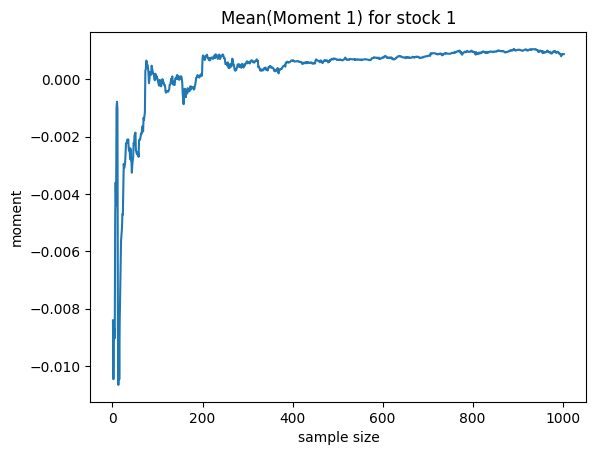

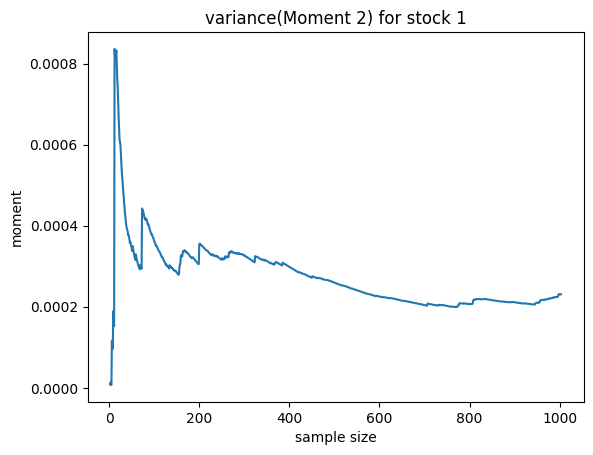

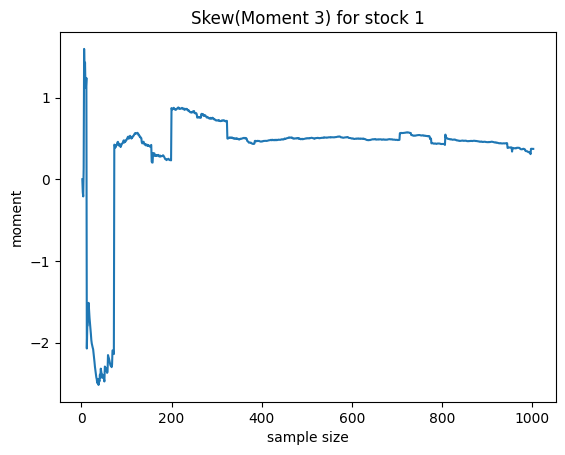

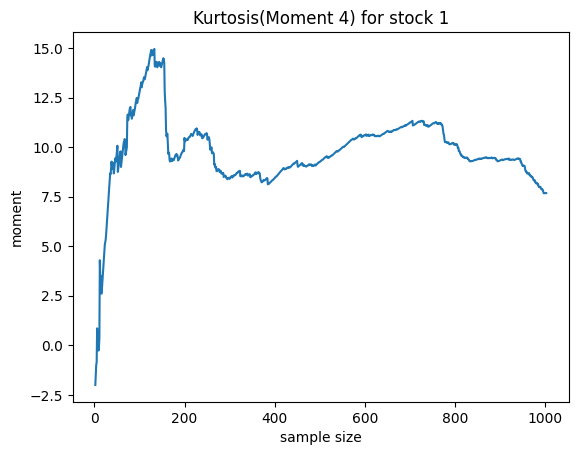

In [ ]:
mean,variance,skew,kurtosis=solve(df[df.columns[0]])
plt.figure(1)

plt.plot(mean)
plt.title("Mean(Moment 1) for stock 1")
plt.ylabel("moment")
plt.xlabel("sample size")

plt.figure(2)
plt.plot(variance)
plt.title("variance(Moment 2) for stock 1")
plt.ylabel("moment")
plt.xlabel("sample size")

plt.figure(3)
plt.plot(skew)
plt.title("Skew(Moment 3) for stock 1")
plt.ylabel("moment")
plt.xlabel("sample size")

plt.figure(4)
plt.plot(kurtosis)
plt.title("Kurtosis(Moment 4) for stock 1")
plt.ylabel("moment")
plt.xlabel("sample size")

Text(0.5, 0, 'sample size')

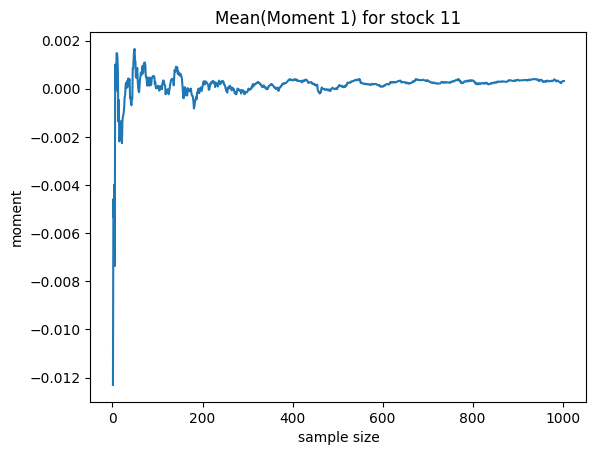

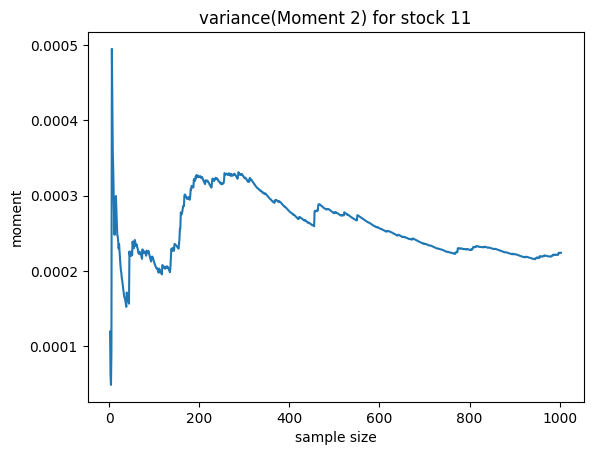

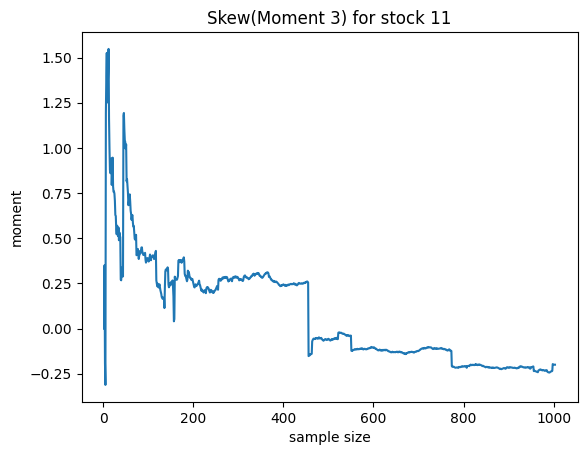

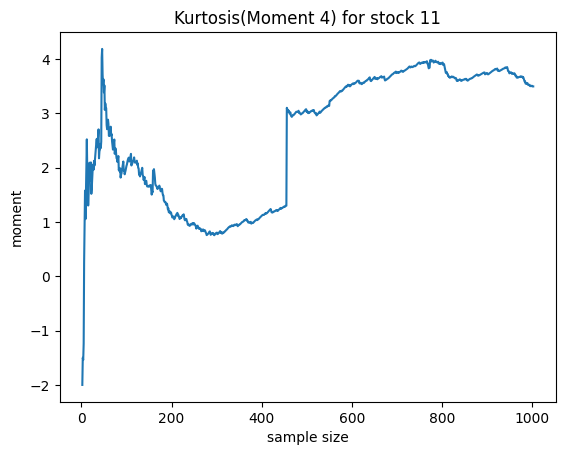

In [ ]:
mean,variance,skew,kurtosis=solve(df[df.columns[10]])
plt.figure(1)

plt.plot(mean)
plt.title("Mean(Moment 1) for stock 11")
plt.ylabel("moment")
plt.xlabel("sample size")

plt.figure(2)
plt.plot(variance)
plt.title("variance(Moment 2) for stock 11")
plt.ylabel("moment")
plt.xlabel("sample size")

plt.figure(3)
plt.plot(skew)
plt.title("Skew(Moment 3) for stock 11")
plt.ylabel("moment")
plt.xlabel("sample size")

plt.figure(4)
plt.plot(kurtosis)
plt.title("Kurtosis(Moment 4) for stock 11")
plt.ylabel("moment")
plt.xlabel("sample size")

Both the stocks above have all the moment as tailed, which means their is higher probability of occurenece of extreme values rather than the mean value.

Let's check this for the last stock in the dataframe

Text(0.5, 0, 'sample size')

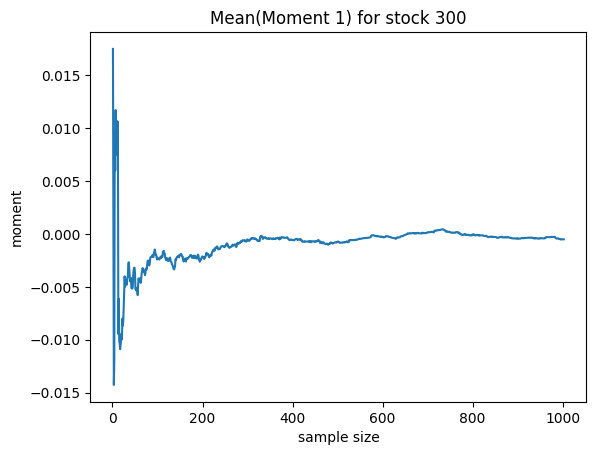

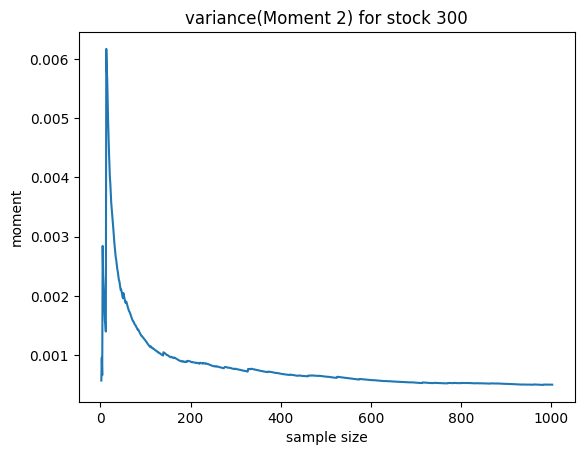

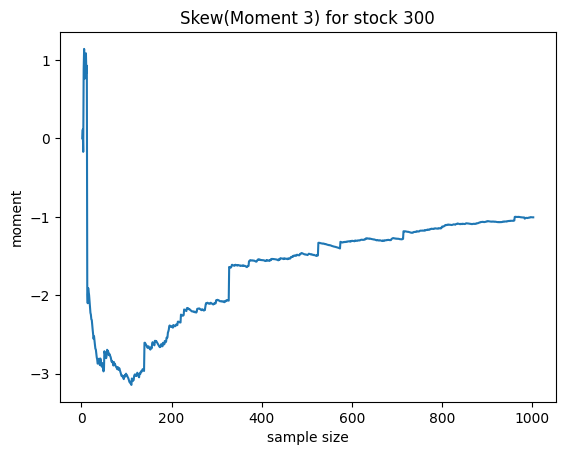

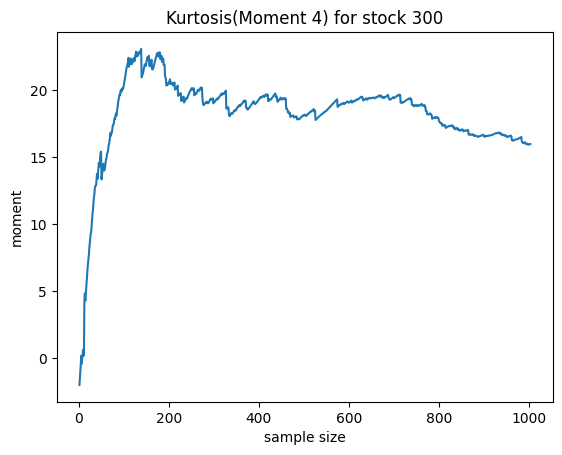

In [ ]:
mean,variance,skew,kurtosis=solve(df[df.columns[299]])
plt.figure(1)

plt.plot(mean)
plt.title("Mean(Moment 1) for stock 300")
plt.ylabel("moment")
plt.xlabel("sample size")

plt.figure(2)
plt.plot(variance)
plt.title("variance(Moment 2) for stock 300")
plt.ylabel("moment")
plt.xlabel("sample size")

plt.figure(3)
plt.plot(skew)
plt.title("Skew(Moment 3) for stock 300")
plt.ylabel("moment")
plt.xlabel("sample size")

plt.figure(4)
plt.plot(kurtosis)
plt.title("Kurtosis(Moment 4) for stock 300")
plt.ylabel("moment")
plt.xlabel("sample size")

The below codeblock consists of the 4 moments of each stock's over the entire evaluation period

In [ ]:
from scipy.stats import kurtosis
from scipy.stats import skew
mean_of_data=[]
variance_of_data=[]
skewness_of_data=[]
kurtosis_of_data=[]
for x in range(300):
    hello=df[df.columns[x]].iloc[2:].pct_change().dropna()
    mean_of_data.append(hello.mean())
    variance_of_data.append(hello.var())
    kurtosis_of_data.append(kurtosis(hello))
    skewness_of_data.append(skew(hello))

stocks=[]
for i in range(300):
    stocks.append(i)

a=pd.DataFrame(columns=['stock','mean','variance','skewness','kurtosis'])
a['stock']=stocks
a['mean']=mean_of_data
a['variance']=variance_of_data
a['skewness']=skewness_of_data
a['kurtosis']=kurtosis_of_data
a

stock      mean  variance  skewness   kurtosis
0        0  0.000913  0.000231  0.368789   7.624224
1        1  0.000513  0.000238 -0.036540   2.872740
2        2  0.001806  0.000372  1.111352  10.041722
3        3  0.000835  0.000228  1.161719  14.655003
4        4  0.000702  0.000318 -0.679360  19.856277
..     ...       ...       ...       ...        ...
295    295  0.000964  0.001443  2.465907  27.958835
296    296 -0.000183  0.000179 -0.397982   1.345801
297    297  0.000870  0.000279 -0.093501   1.357585
298    298 -0.000049  0.000411 -0.283929   3.037929
299    299 -0.000445  0.000498 -1.005614  15.911187

[300 rows x 5 columns]

**Observation:** The plot seems to have a heavy tail which means a constant non-zero moment over a time for different stocks. Since the given data is small, with a larger data the results could be more accurate

**3. Gain/Loss Assymetry:**The idea is one observes large drawdowns in
stock prices and stock index values but not equally large
upward movements.

In [ ]:
returns

0      -0.009346
1      -0.014678
2       0.012625
3       0.028994
4      -0.008441
          ...   
1000   -0.042635
1001    0.066078
1002    0.006147
1003   -0.007839
1004    0.011686
Length: 1005, dtype: float64

In [ ]:
df["Returns"] = 0
for i in range(0,len(df)-1):
  df.iloc[i,300]=((df.iloc[i+1,0]-df.iloc[i,0])/(df.iloc[i,0]))*100

In [ ]:
df["Returns"]

Date
2015-01-02   -0.930282
2015-01-05   -1.457097
2015-01-06    1.270537
2015-01-07    2.941813
2015-01-08   -0.840513
                ...   
2018-12-24    6.830978
2018-12-26    0.616547
2018-12-27   -0.780787
2018-12-28    1.175416
2018-12-31    0.000000
Name: Returns, Length: 1006, dtype: float64

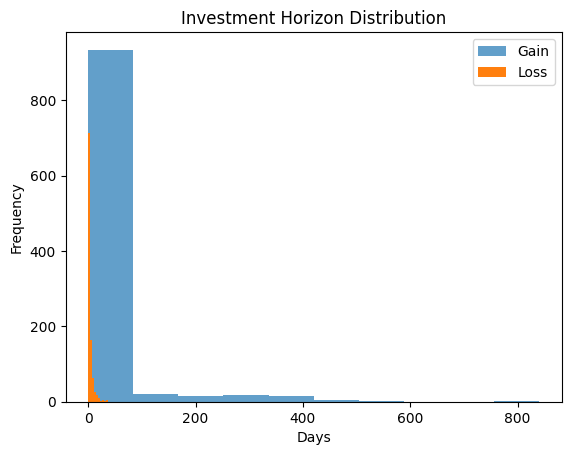

In [ ]:
threshold = 0.05

gain = []
loss = []

for i in range(0,len(df["Returns"])):
    cumreturn = (1 + df["Returns"][i:]).cumprod() - 1
    gain.append(next((j for j,v in enumerate(cumreturn,1) if v>threshold), 0))
    loss.append(next((j for j,v in enumerate(cumreturn,1) if v<-threshold), 0))

plt.hist(gain, alpha=0.7, label='Gain')
plt.hist(loss, alpha=1, label='Loss')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.title('Investment Horizon Distribution')
plt.show()

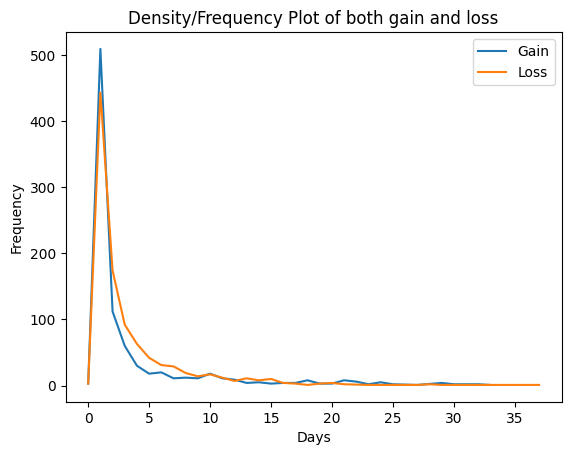

In [ ]:
from collections import Counter
count_dict1 = Counter(loss)
sorted_count_dict1 = dict(sorted(count_dict1.items()))
items1, counts1 = zip(*sorted_count_dict1.items())


count_dict2 = Counter(gain)
sorted_count_dict2 = dict(sorted(count_dict2.items()))
items2, counts2 = zip(*sorted_count_dict2.items())


start_value = 0
end_value = 35
filtered_count_dict = {k: v for k, v in sorted_count_dict2.items() if start_value <= k <= end_value}
items3, counts3 = zip(*filtered_count_dict.items())



plt.plot(items3, counts3, label='Gain')
plt.plot(items1,  counts1, label='Loss')
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.title("Density/Frequency Plot of both gain and loss")
plt.legend()
plt.show()

**Observation**: As we can see, that the breadth of the loss histogram is shorter than the gain histogram showing that loss is achieved faster than gaining the same amount and in the second plot we can see that the target is achieved by Loss in lesser days as compared to Gain since the maxima of Loss lies to the left of the maxima of Gain. We have also tried doing this on a bigger dataset which gave better result. Since the given dataset is smaller it was quite close between the gain and loss.

4. **Aggregational Gaussanity:** Increasing the time scale (Δt) over which returns are calculated, their distribution looks more like a normal distribution and the shape of the distribution changes at different time scales.

In [ ]:
data=pd.read_excel("Dataset.xlsx")
data = data.transpose()

In [ ]:
daily_returns=[]
three_day_returns=[]
weekly_returns=[]
ten_day_returns=[]
monthly_returns=[]
data['Daily_Returns'] = 0
data['Three_Day_Returns'] = 0
data['Weekly_Returns'] = 0
data['Ten_Day_Returns'] = 0
data['Monthly_Returns'] = 0
def returns(stock_index):
  for i in range(3,len(data)):
    daily_return=data[stock_index].iloc[i]-data[stock_index].iloc[i-1]
    daily_returns.append(daily_return)
    data['Daily_Returns'][i]=daily_return
  for i in range(6,len(data)):
    three_day_return=data[stock_index].iloc[i]-data[stock_index].iloc[i-3]
    three_day_returns.append(three_day_return)
    data['Three_Day_Returns'][i]=three_day_return
  for i in range(8,len(data)):
    weekly_return=data[stock_index].iloc[i]-data[stock_index].iloc[i-5]
    weekly_returns.append(weekly_return)
    data['Weekly_Returns'][i]=weekly_return
  for i in range(13,len(data)):
    ten_day_return=data[stock_index].iloc[i]-data[stock_index].iloc[i-10]
    ten_day_returns.append(ten_day_return)
    data['Ten_Day_Returns'][i]=ten_day_return
  for i in range(33,len(data)):
    monthly_return=data[stock_index].iloc[i]-data[stock_index].iloc[i-20]
    monthly_returns.append(monthly_return)
    data['Monthly_Returns'][i]=monthly_return
returns(1)

<ipython-input-156-d1948002aa30>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Daily_Returns'][i]=daily_return
<ipython-input-156-d1948002aa30>:15: FutureWarning: Treating integers as positional in Series.__setitem__ with a Float64Index is deprecated. In a future version, `series[an_int] = val` will insert a new key into the Series. Use `series.iloc[an_int] = val` to treat the key as positional.
  data['Daily_Returns'][i]=daily_return
<ipython-input-156-d1948002aa30>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Three_Day_Returns'][i]=three_day_return
<ipython-input-156-d1948002aa30>:19: FutureWarni

In [ ]:
from scipy.stats import norm
import seaborn as sns

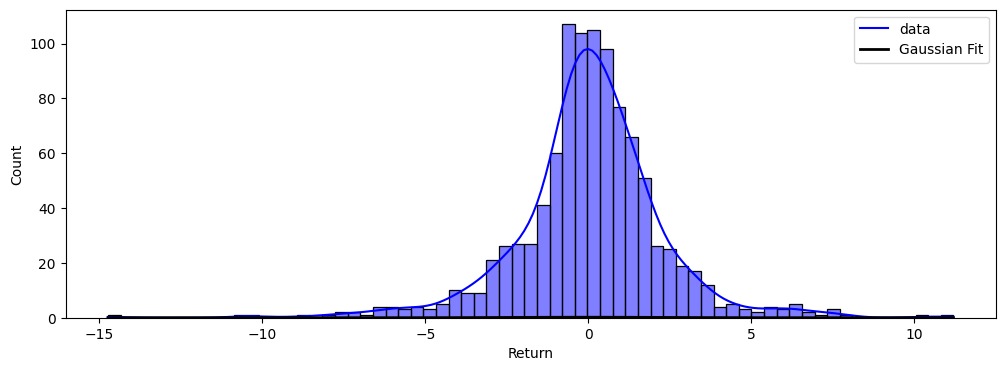

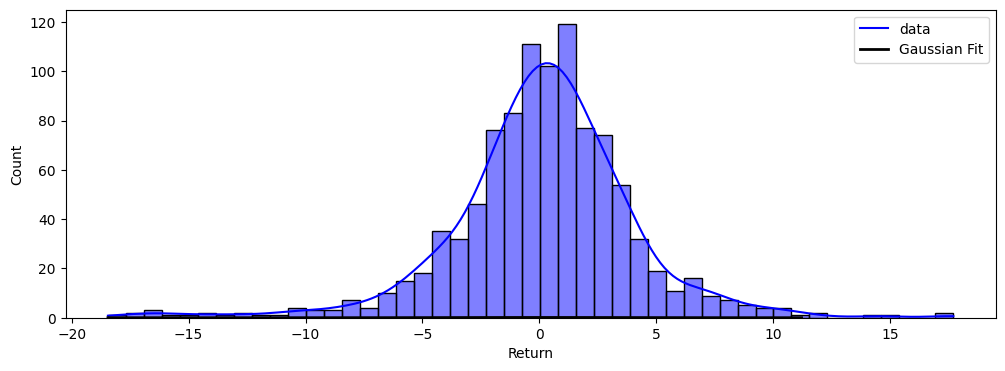

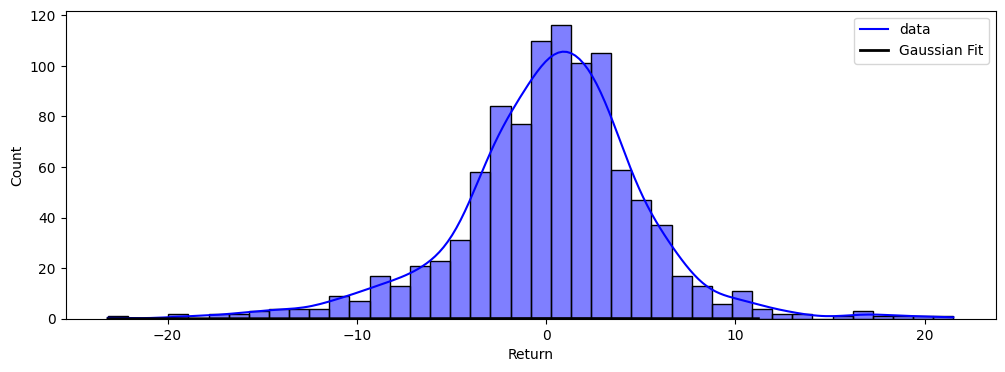

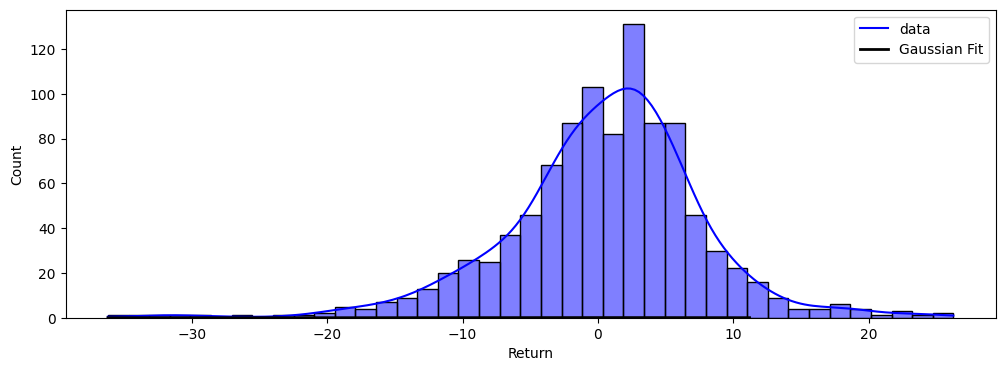

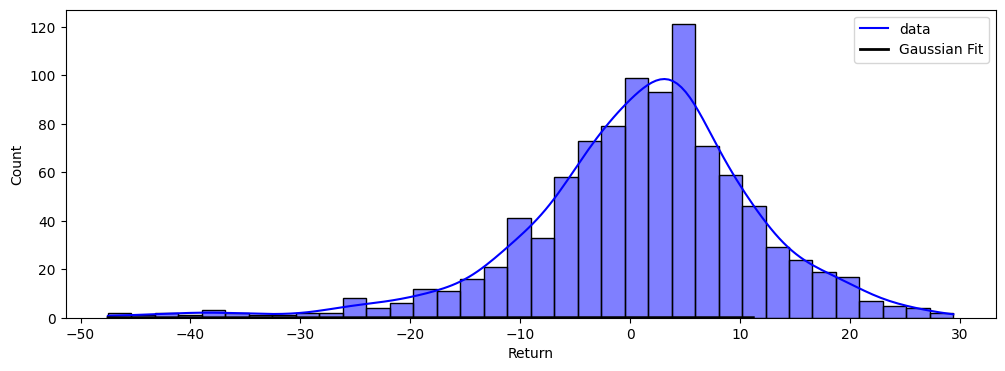

In [ ]:
def plot_and_compare(data):
    plt.figure(figsize=(12, 4))
    sns.histplot(data, kde=True, color='blue',)
    x = np.linspace(min(data), max(daily_returns), 100)
    mu = np.mean(data)
    std = np.std(data)
    gaussian = 1 / (std * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 / (2 * std**2))
    plt.plot(x, gaussian, 'k', linewidth=2, label='Gaussian Fit')
    plt.legend()
    plt.xlabel('Return')
    plt.legend(['data', 'Gaussian Fit'])
plot_and_compare(daily_returns)
plot_and_compare(three_day_returns)
plot_and_compare(weekly_returns)
plot_and_compare(ten_day_returns)
plot_and_compare(monthly_returns)


In [ ]:
from scipy import stats
def kolmogorov_smirnov(data,name):
  ks_statistic, p_value = stats.kstest(data, 'norm')

  alpha = 0.05
  print(f'KS Statistic for {name}:', ks_statistic)
  print(f'P-value for {name}:', p_value)


kolmogorov_smirnov(daily_returns,'daily')
kolmogorov_smirnov(three_day_returns,'three_day')
kolmogorov_smirnov(weekly_returns,'weekly')
kolmogorov_smirnov(ten_day_returns,'ten_day')
kolmogorov_smirnov(monthly_returns,'monthly')


KS Statistic for daily: 0.133050261683046
P-value for daily: 5.641721919544561e-16
KS Statistic for three_day: 0.26190070201596827
P-value for three_day: 3.9358225469263466e-61
KS Statistic for weekly: 0.3333661388767293
P-value for weekly: 1.4384078678602214e-99
KS Statistic for ten_day: 0.42785371943130657
P-value for ten_day: 6.960887547822352e-166
KS Statistic for monthly: 0.47670401872885937
P-value for monthly: 4.238699460598645e-204


Inferences: From the plots we see as the time frame increase the plot tends to be more gaussian in nature and we verified the observation using the Kolmogorov Test.
We can observe that as we increase the time period , the ks-statistic increases and p-value decreases. According to Kolmogorov-Smirnov test the closer the p-values are to zero, more similar the distributions are.
So as we can see P-values are decreasing as we are increasing the time frame.
This shows that the returns distribution are closer to gaussian distribution as we increase the timeframe.
So aggregational Gaussanity is proved.

**5. Intermittency:** The word intermittent means irregular or not happening regularly. Such irregularity is often observed in the financial market wherein the returns display high degree variability at different times. In other words, intermittence is the presence of irregular bursts in the price returns of a time series.

In [ ]:
stock = pd.DataFrame(df.iloc[:, 0])
price = np.array(stock.iloc[:, 0])

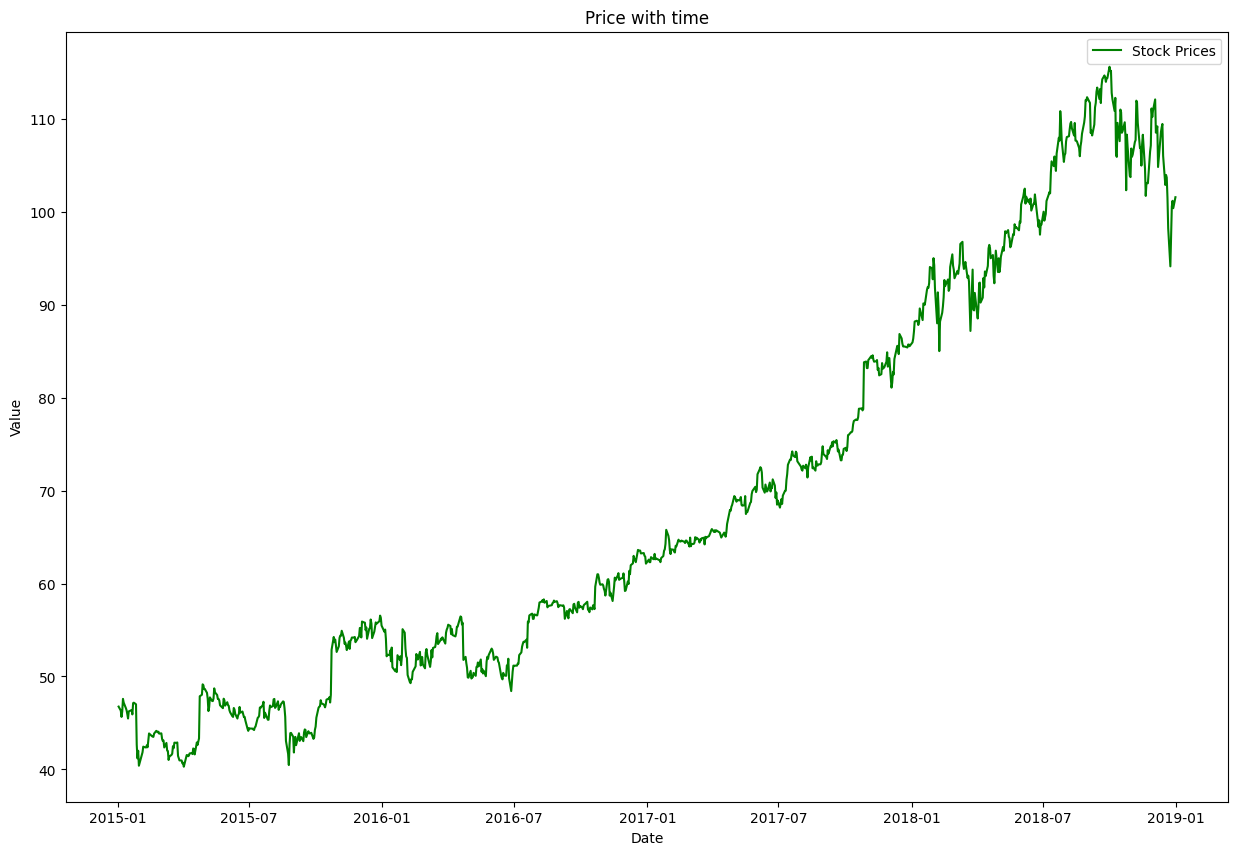

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(stock.index, stock.iloc[:, 0], '-g', label = 'Stock Prices')
plt.title("Price with time")
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

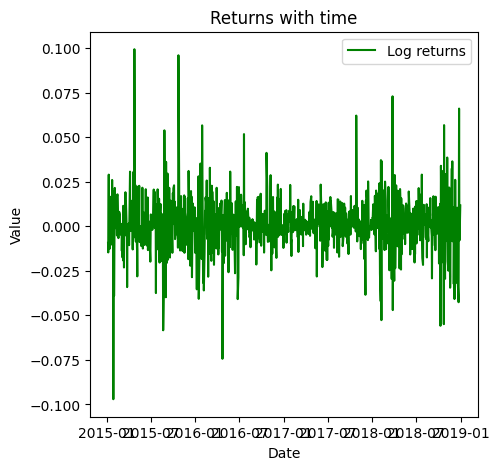

In [ ]:
returns = []
for i in range(0, 1005):
    returns.append(np.log(stock.iat[i+1, 0]) - np.log(stock.iat[i, 0]))

plt.figure(figsize=(5,5))
plt.plot(stock.index[1:], returns, '-g', label = 'Log returns')
plt.title("Returns with time")
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

returns = pd.DataFrame(returns, columns = ['Price'], index = [stock.index[1:]])

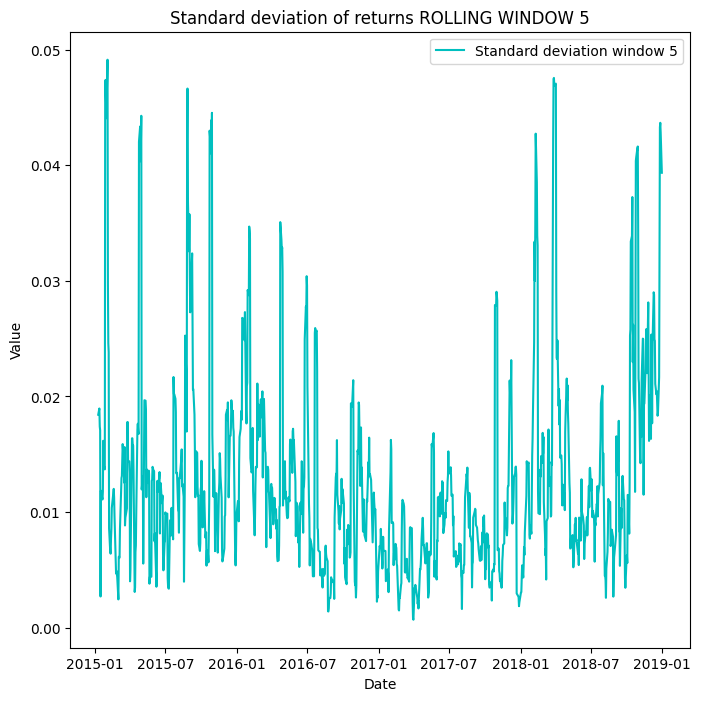

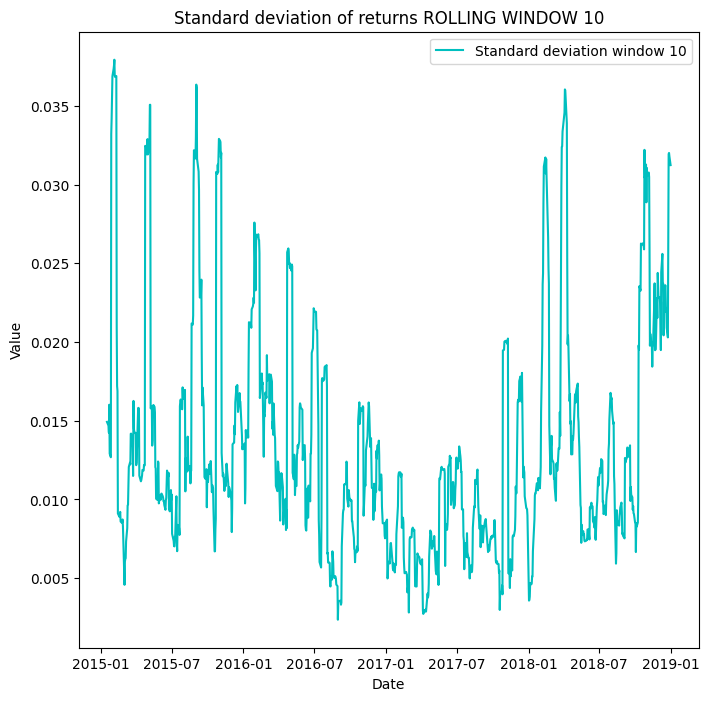

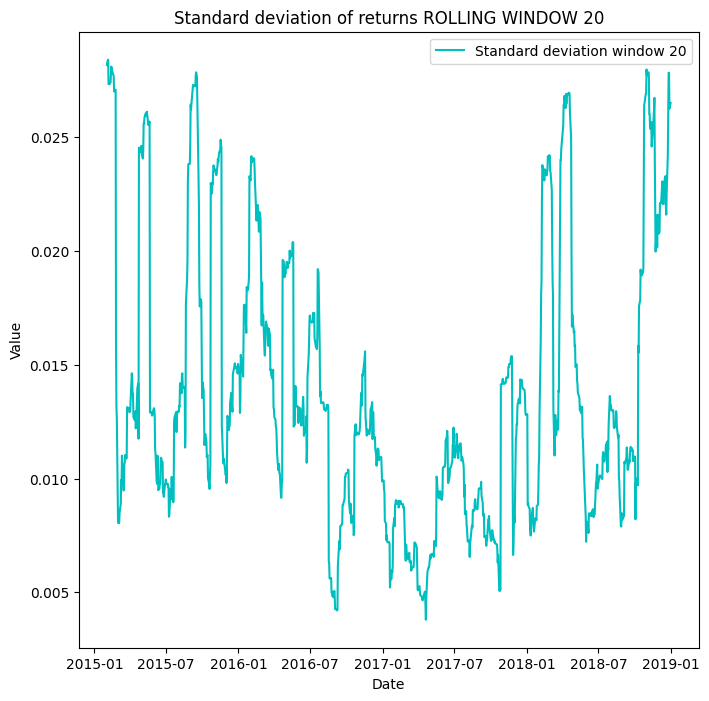

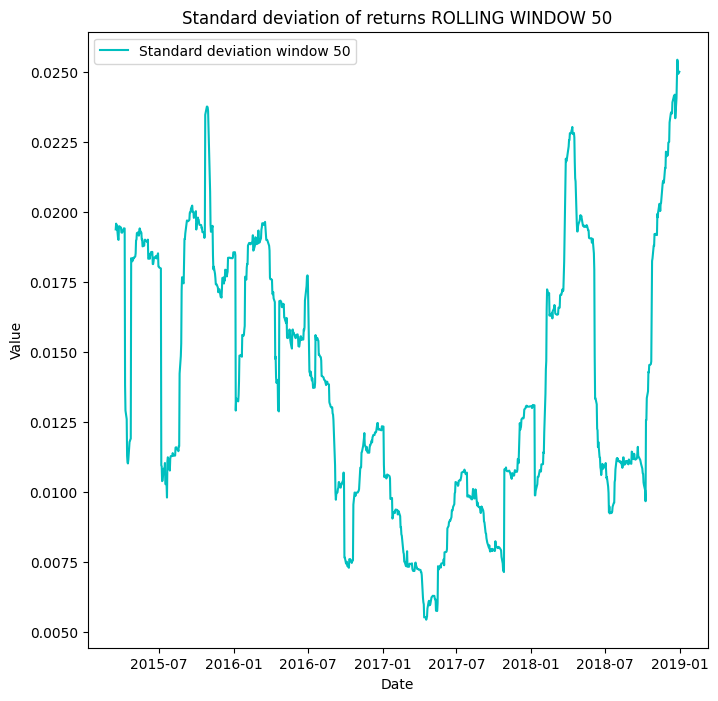

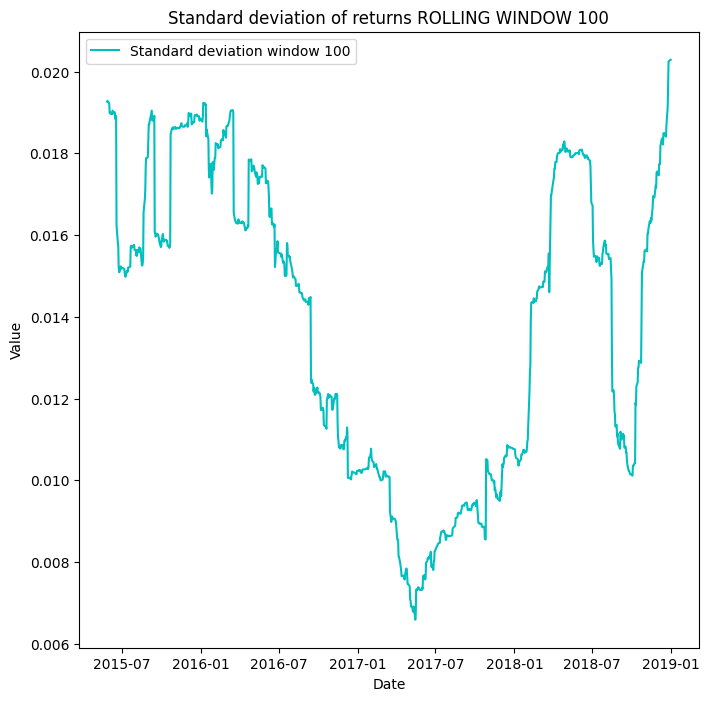

In [ ]:
rolling_windows = [5, 10, 20, 50, 100]
for i in rolling_windows:
    plt.figure(figsize=(8,8))
    plt.plot(stock.index[i:], returns.rolling(i).std().dropna(), '-c', label = f'Standard deviation window {i}')
    plt.title(f'Standard deviation of returns ROLLING WINDOW {i}')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

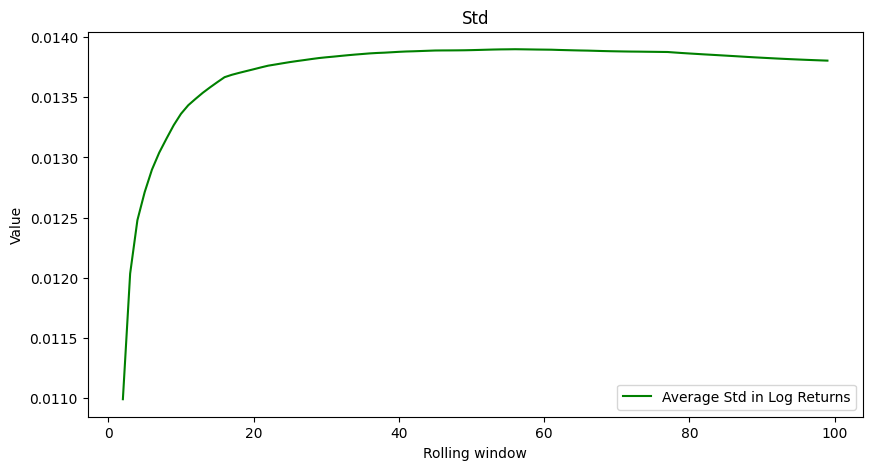

In [ ]:
avg_std = []
for i in range(2, 100):
    avg_std.append(np.average((returns.rolling(i).std().dropna())))

plt.figure(figsize=(10,5))
plt.plot(np.arange(2, 100),avg_std, '-g', label = 'Average Std in Log Returns')
plt.title("Std")
plt.xlabel('Rolling window')
plt.ylabel('Value')
plt.legend()
plt.show()

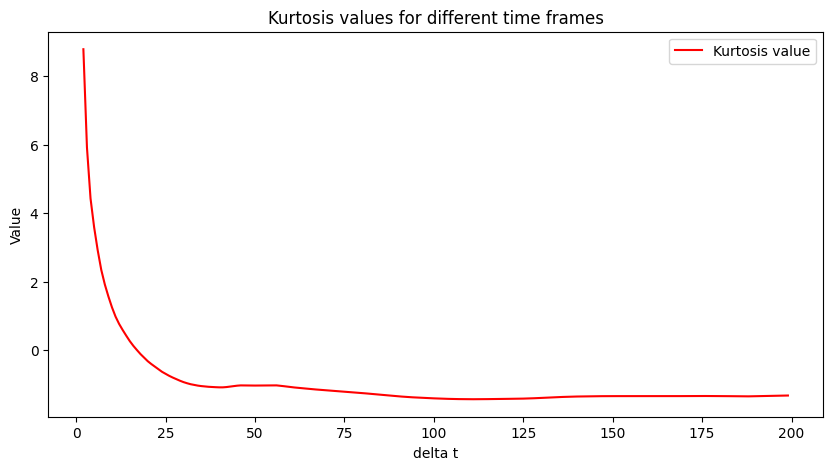

In [ ]:
kurtosis_val = []

for i in range(2,200):
    kurtosis_val.append(kurtosis(returns.rolling(i).std().dropna()))

plt.figure(figsize=(10,5))
plt.plot(np.arange(2, 200), kurtosis_val, '-r', label = 'Kurtosis value')
plt.title("Kurtosis values for different time frames")
plt.xlabel('delta t')
plt.ylabel('Value')
plt.legend()
plt.show()

**Observation:** The average standard deviation of the log returns of the first stock initially increases with increasing rolling window period but doesn't vary much after a certain period approx 40 in this case. On the other hand, the kurtosis value significantly decreases initially but again remians similar after a period of 40 for the stock. Therefore, there is irregulaties can be seen.

6. **Volatility Clustering** : It means that different measures of volatility
display a positive autocorrelation over several days. Periods of high volatility are followed by periods of high volatility and periods of low volatility are followed by periods of low volatilty.
Or in other words correlation for volatility is close to 1 for small lag periods

In [ ]:
data=pd.read_excel("Dataset.xlsx")

In [ ]:
L=[]
L=[[i,0,0,0,0,0,0] for i in range(len(data))]
data2=pd.DataFrame(data = L,columns=["StockNumber","Correlation based on LjungBox","Correlationfor1daylag","Correlationfor5daylag","Correlationfor10daylag","Correlationfor20daylag","Correlationfor30daylag"])
price=[]
returns=[]
std=[]
for j in range(len(data)):
    price=data.iloc[j,2:]
    returns=price.diff()
    std=returns.rolling(30).std()        #calculated volatility
    if(sm.stats.diagnostic.acorr_ljungbox(std[30:],lags=1).iloc[0,1]<0.05):
      data2["Correlation based on LjungBox"][j]="YES"
    else:
      data2["Correlation based on LjungBox"][j]="NO"
    data2["StockNumber"][j]=j+1
    data2["Correlationfor1daylag"][j]=sm.tsa.acf(std[30:])[1]
    data2["Correlationfor5daylag"][j]=sm.tsa.acf(std[30:])[5]
    data2["Correlationfor10daylag"][j]=sm.tsa.acf(std[30:])[10]
    data2["Correlationfor20daylag"][j]=sm.tsa.acf(std[30:])[20]
    data2["Correlationfor30daylag"][j]=sm.tsa.acf(std[30:])[29]

data2   #correlation between volatility for different lag periods

<ipython-input-167-f687c5087405>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2["StockNumber"][j]=j+1
<ipython-input-167-f687c5087405>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2["Correlationfor1daylag"][j]=sm.tsa.acf(std[30:])[1]
<ipython-input-167-f687c5087405>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2["Correlationfor5daylag"][j]=sm.tsa.acf(std[30:])[5]
<ipython-input-167-f687c5087405>:18: SettingWi

StockNumber Correlation based on LjungBox  Correlationfor1daylag  \
0              1                           YES               0.987296   
1              2                           YES               0.989112   
2              3                           YES               0.990037   
3              4                           YES               0.988158   
4              5                           YES               0.980226   
..           ...                           ...                    ...   
295          296                           YES               0.981954   
296          297                           YES               0.977410   
297          298                           YES               0.979542   
298          299                           YES               0.979383   
299          300                           YES               0.957801   

     Correlationfor5daylag  Correlationfor10daylag  Correlationfor20daylag  \
0                 0.927004                0.853858                0.686542   
1                 0.938412                0.865015                0.673875   
2                 0.942789                0.876701                0.710376   
3                 0.930600                0.851289                0.676467   
4                 0.898480                0.788199                0.561372   
..                     ...                     ...                     ...   
295               0.888136                0.760952                0.522841   
296               0.881123                0.767707                0.567975   
297               0.883147                0.759722                0.498565   
298               0.884568                0.764474                0.475209   
299               0.779267                0.559794                0.270291   

     Correlationfor30daylag  
0                  0.522833  
1                  0.497975  
2                  0.543928  
3                  0.497316  
4                  0.348445  
..                      ...  
295                0.309206  
296                0.406782  
297                0.287047  
298                0.208667  
299                0.226305  

[300 rows x 7 columns]

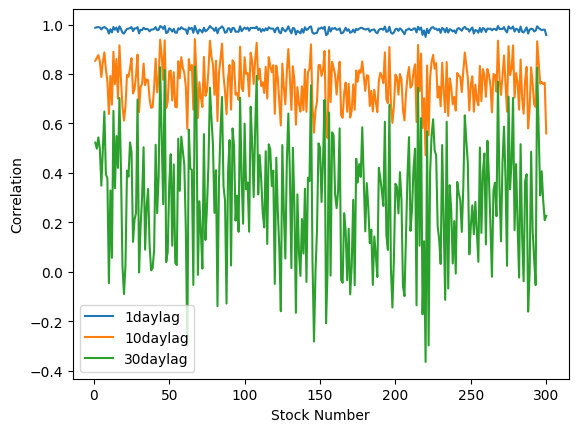

In [ ]:
plt.plot(data2["StockNumber"],data2["Correlationfor1daylag"],label='1daylag')
plt.plot(data2["StockNumber"],data2["Correlationfor10daylag"],label='10daylag')
plt.plot(data2["StockNumber"],data2["Correlationfor30daylag"],label='30daylag')
plt.xlabel("Stock Number")
plt.ylabel("Correlation")
plt.legend()
plt.show()

**Observation**:
For all 300 stocks, correlation for 1 day lag period is very close to 1 thus indicating volatility clusters i.e. autocorrelates. As the time period increases the correlation decreases which means they are clusttered.

7.  **Conditional heavy tails:** After correcting returns for
volatility clustering, the residual time series still exhibit heavy tails. However, the tails are less heavy than in the unconditional distribution
of returns.

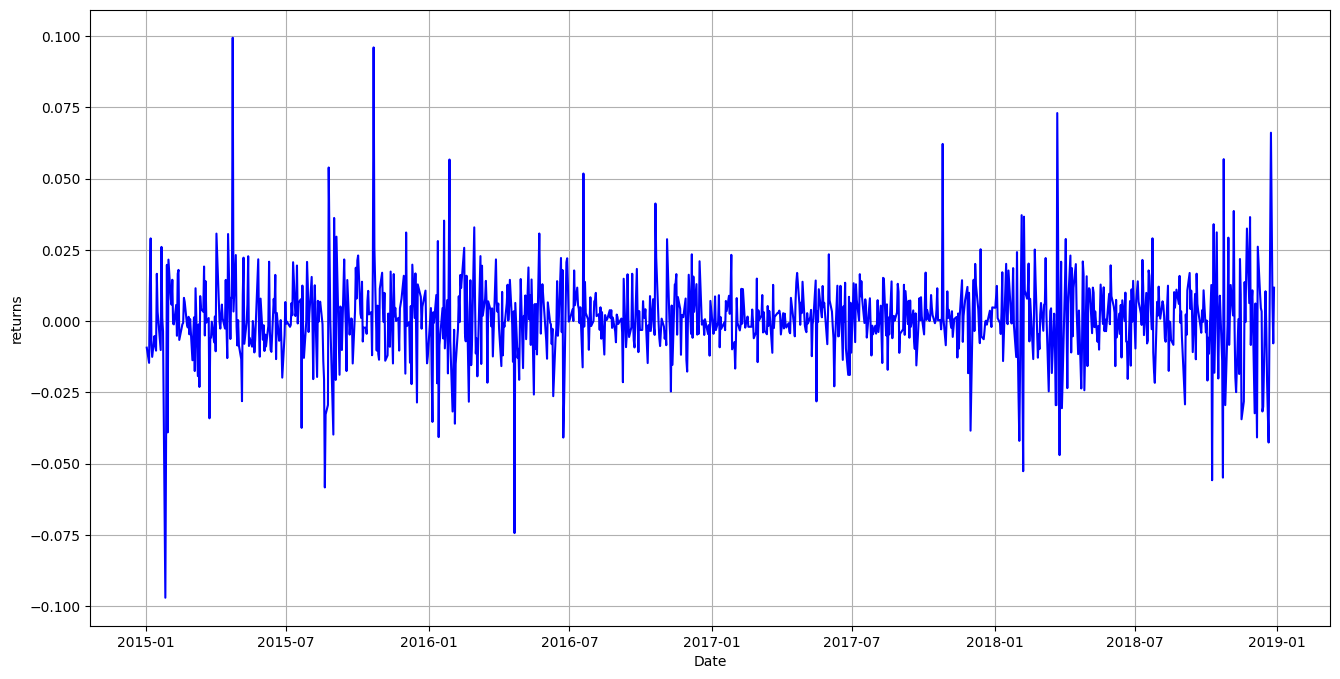

In [ ]:
returns=pd.Series(stock_returns(df,0))
data = pd.DataFrame({'returns': returns})

In [ ]:
from arch import arch_model
from datetime import datetime
model = arch_model(data['returns'],mean='Zero', vol='Garch', p=15, q=15)
result = model.fit()

Iteration:      1,   Func. Count:     33,   Neg. LLF: -2045.234959829017
Iteration:      2,   Func. Count:     69,   Neg. LLF: 3483.4810229619998
Iteration:      3,   Func. Count:    105,   Neg. LLF: -2821.87355992581
Optimization terminated successfully    (Exit mode 0)
            Current function value: -2821.8735594827267
            Iterations: 7
            Function evaluations: 105
            Gradient evaluations: 3


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002296. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [ ]:
!pip install arch

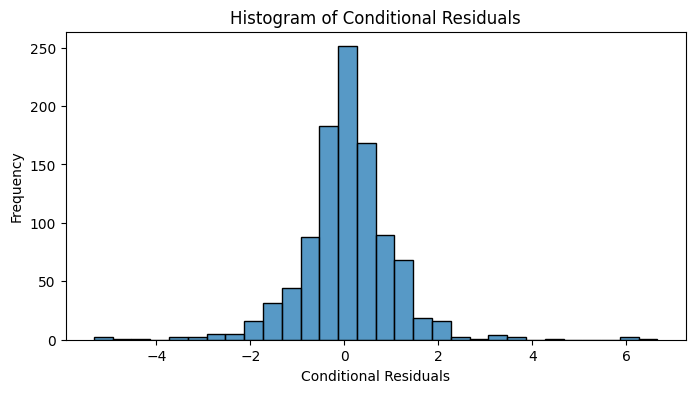

In [ ]:
conditional_variances = result.conditional_volatility
conditional_residuals = data['returns'] / conditional_variances
plt.figure(figsize=(8, 4))
sns.histplot(conditional_residuals, bins=30, kde=False)
plt.title('Histogram of Conditional Residuals')
plt.xlabel('Conditional Residuals')
plt.ylabel('Frequency')
plt.show()

<ipython-input-173-dccf96ecfddb>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(conditional_residuals, shade=True)


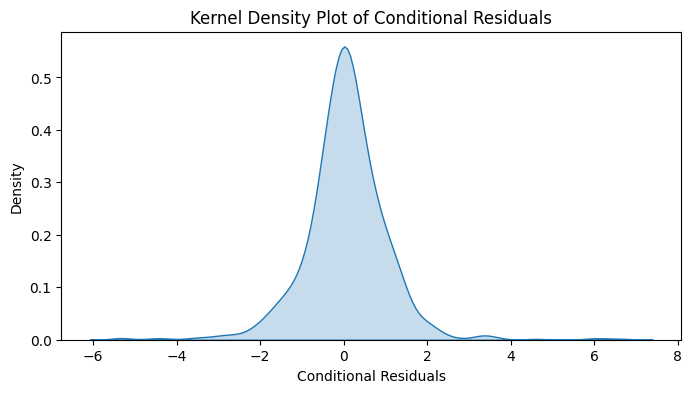

In [ ]:
plt.figure(figsize=(8, 4))
sns.kdeplot(conditional_residuals, shade=True)
plt.title('Kernel Density Plot of Conditional Residuals')
plt.xlabel('Conditional Residuals')
plt.ylabel('Density')
plt.show()

In [ ]:
from scipy.stats import moment
cumulative_mean_list = []
cumulative_variance_list = []
cumulative_skewness_list = []
cumulative_kurtosis_list = []

for window in range(1, len(conditional_residuals) + 1):
    window_data = conditional_residuals[:window]

    cumulative_mean = np.mean(window_data)
    cumulative_variance = np.var(window_data)
    cumulative_skewness = moment(window_data, moment=3)
    cumulative_kurtosis = moment(window_data, moment=4)

    cumulative_mean_list.append(cumulative_mean)
    cumulative_variance_list.append(cumulative_variance)
    cumulative_skewness_list.append(cumulative_skewness)
    cumulative_kurtosis_list.append(cumulative_kurtosis)

for i in range(len(cumulative_mean_list)):
    print(f"Cumulative Statistics up to Day {i+1}:")
    print(f"Mean: {cumulative_mean_list[i]}")
    print(f"Variance: {cumulative_variance_list[i]}")
    print(f"Skewness: {cumulative_skewness_list[i]}")
    print(f"Kurtosis: {cumulative_kurtosis_list[i]}")
    print()


Streaming output truncated to the last 5000 lines.
Kurtosis: 20.636606606130638

Cumulative Statistics up to Day 173:
Mean: -0.025097230894936564
Variance: 1.246174661986157
Skewness: 0.512199524793023
Kurtosis: 20.514066249054412

Cumulative Statistics up to Day 174:
Mean: -0.023734086746467164
Variance: 1.2393342006621335
Skewness: 0.5042643607099747
Kurtosis: 20.393424148486375

Cumulative Statistics up to Day 175:
Mean: -0.02639342702558554
Variance: 1.2334828347293687
Skewness: 0.5106476533363236
Kurtosis: 20.282537946120964

Cumulative Statistics up to Day 176:
Mean: -0.020104886163077814
Variance: 1.2333949151134431
Skewness: 0.49218050238359384
Kurtosis: 20.163149057092948

Cumulative Statistics up to Day 177:
Mean: -0.017942785137016772
Variance: 1.227249326088748
Skewness: 0.48175614673696193
Kurtosis: 20.04515329485926

Cumulative Statistics up to Day 178:
Mean: -0.018160762613314483
Variance: 1.2203630769633087
Skewness: 0.4798473583801263
Kurtosis: 19.93295812259136

Cumul

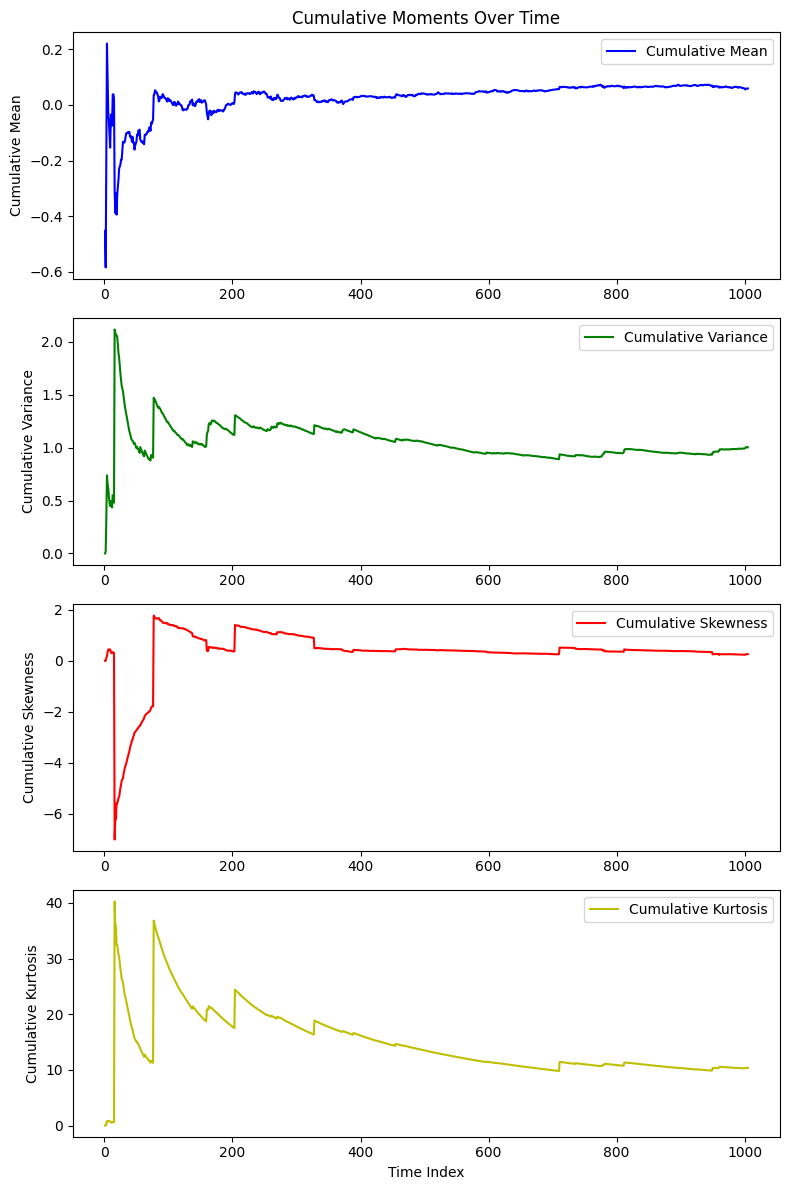

In [ ]:
time_indices = range(1, len(conditional_residuals) + 1)

fig, axes = plt.subplots(4, 1, figsize=(8, 12))

# cumulative mean
axes[0].plot(time_indices, cumulative_mean_list, label='Cumulative Mean', color='b')
axes[0].set_ylabel('Cumulative Mean')
axes[0].set_title('Cumulative Moments Over Time')

# cumulative variance
axes[1].plot(time_indices, cumulative_variance_list, label='Cumulative Variance', color='g')
axes[1].set_ylabel('Cumulative Variance')

# cumulative skewness
axes[2].plot(time_indices, cumulative_skewness_list, label='Cumulative Skewness', color='r')
axes[2].set_ylabel('Cumulative Skewness')

# cumulative kurtosis
axes[3].plot(time_indices, cumulative_kurtosis_list, label='Cumulative Kurtosis', color='y')
axes[3].set_xlabel('Time Index')
axes[3].set_ylabel('Cumulative Kurtosis')

for ax in axes:
    ax.legend()

plt.tight_layout()
plt.show()


**Observation:**  It says that for given stock data if we plot moments (Expectations like mean and variance etc) then as the sample size increases the plot seems to have a heavy tale which means a constant non-zero moment over a time.After correcting returns for
volatility clustering the moments plots still have heavy tails though the tails are less heavy then the unconditional distribution

**8. Slow decay of autocorrelation in absolute returns**: Similar to autocorrelation, The term "slow decay" implies that the autocorrelation between absolute returns remains relatively high or significant even at longer time lags. In other words, the influence of past absolute returns on current absolute returns doesn't diminish quickly as we look back in time.

In [ ]:
from scipy.optimize import curve_fit

In [ ]:
df = pd.read_excel("Dataset.xlsx")
df.drop(df.columns[0], axis = 1, inplace = True)
df = df.transpose()
df.columns = df.iloc[0]
df = df[1:]
df.index.names = ['Date']
df.columns.names = ['Stock Identifiers']
for i in df.index.tolist():
    df = df.rename(index={i: datetime.strptime(str(i), '%Y%m%d').date()})

In [ ]:
def power_law(x, A, beta):
    return A * x**(-beta)

In [ ]:
df['Absolute_Returns_Stock1'] = df[df.columns[0]].diff().abs()

In [ ]:
acf = np.correlate(df['Absolute_Returns_Stock1'].dropna(), df['Absolute_Returns_Stock1'].dropna(), mode='full')

In [ ]:
acf /= acf.max()
time_lags = np.arange(0, len(acf))

In [ ]:
popt, _ = curve_fit(power_law, time_lags, acf, p0=[1, 0.2])

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [ ]:
A, beta = popt

In [ ]:
print(f"Estimated Beta: {beta:.4f}")

Estimated Beta: 0.2000


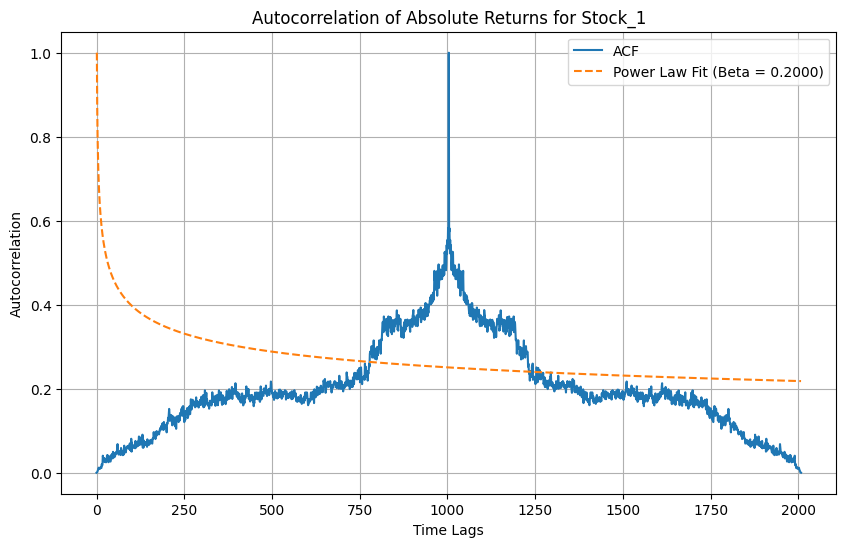

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(time_lags, acf, label='ACF')
plt.plot(time_lags, power_law(time_lags, A, beta), label=f'Power Law Fit (Beta = {beta:.4f})', linestyle='--')
plt.xlabel('Time Lags')
plt.ylabel('Autocorrelation')
plt.legend()
plt.title(f'Autocorrelation of Absolute Returns for Stock_1')
plt.grid(True)
plt.show()

**Observation**: The power law fit is decaying with time lags for the autocorrelation of Absolute returns. The symmetry in the ACF occurs because the correlation between time series values at a positive lag (e.g., one day in the future) is the same as the correlation between the same values at a negative lag (e.g., one day in the past).

**9. Leverage Effect:** It means that most measures of volatility of an asset
are negatively correlated with the returns of that asset. In simple words when the returns of an asset go down, its volatility tends to go up, and vice versa.

In [ ]:
df = pd.read_excel("Dataset.xlsx")

In [ ]:
df.drop(df.columns[0], axis = 1, inplace = True)
df = df.transpose()
df.columns = df.iloc[0]
df = df[1:]

In [ ]:
df.index.names = ['Date']
df.columns.names = ['Stock Identifiers']

In [ ]:
for i in df.index.tolist():
    df = df.rename(index={i: datetime.strptime(str(i), '%Y%m%d').date()})

In [ ]:
df.head()

Stock Identifiers  10107.0  14593.0    84788.0    14542.0  13407.0    90319.0  \
Date                                                                            
2015-01-02          46.760   109.33  308.51999  524.81000   78.450  529.54999   
2015-01-05          46.325   106.25  302.19000  513.87000   77.190  519.46002   
2015-01-06          45.650   106.26  295.29001  501.95999   76.150  506.64001   
2015-01-07          46.230   107.75  298.42001  501.10001   76.150  505.14999   
2015-01-08          47.590   111.89  300.45999  502.67999   78.175  506.91000   

Stock Identifiers  59328.0  76076.0  13856.0  89525.0  ...  88343.0  80329.0  \
Date                                                   ...                     
2015-01-02           36.36    27.61    94.44    57.35  ...    45.78    11.10   
2015-01-05           35.95    27.06    93.73    55.96  ...    44.55    10.82   
2015-01-06           35.28    27.05    93.02    55.23  ...    43.51    10.47   
2015-01-07           36.02    27.30    95.74    55.18  ...    44.04    10.89   
2015-01-08           36.69    27.51    97.48    56.38  ...    44.82    11.09   

Stock Identifiers  27684.0  88439.0  78981.0  15065.0  81917.0  79824.0  \
Date                                                                      
2015-01-02           42.80    13.10    72.08    27.48    31.45    29.53   
2015-01-05           42.26    12.66    69.49    33.79    31.37    28.67   
2015-01-06           41.10    12.24    68.81    35.06    31.39    27.73   
2015-01-07           41.36    12.39    68.47    36.23    31.55    27.53   
2015-01-08           42.34    12.58    69.19    35.22    32.10    27.51   

Stock Identifiers  90805.0  93179.0  
Date                                 
2015-01-02           34.48    31.66  
2015-01-05           33.06    30.81  
2015-01-06           31.98    31.26  
2015-01-07           32.21    32.12  
2015-01-08           32.47    33.12  

[5 rows x 300 columns]

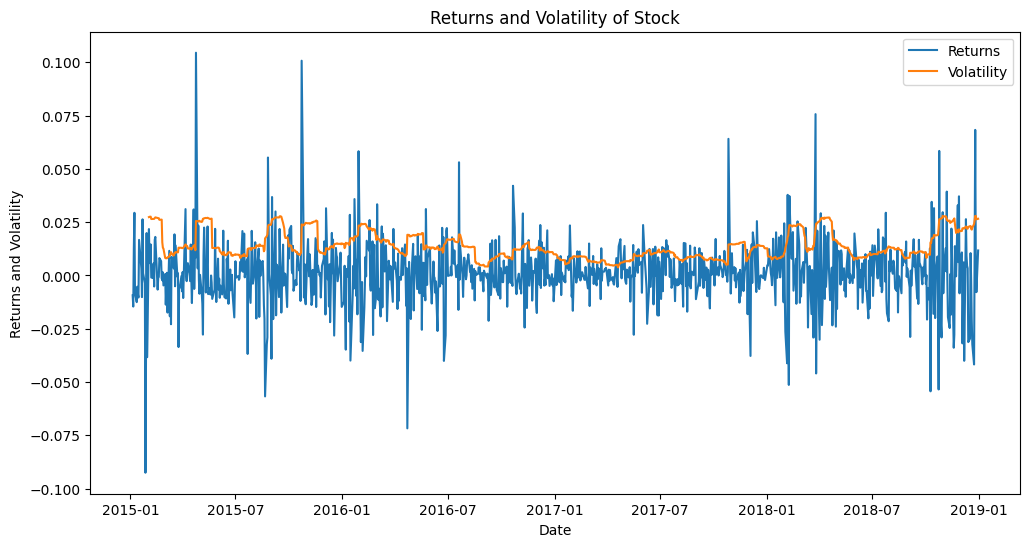

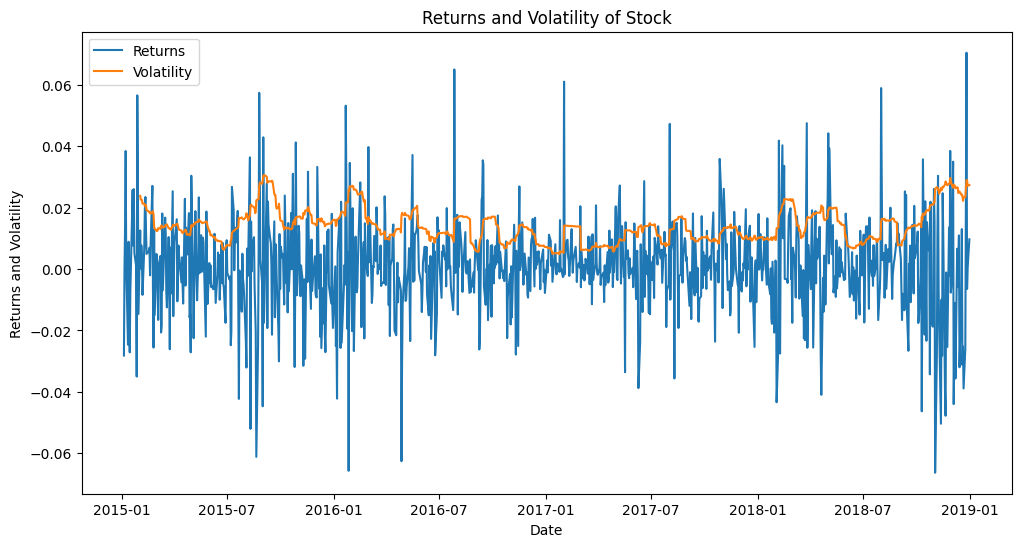

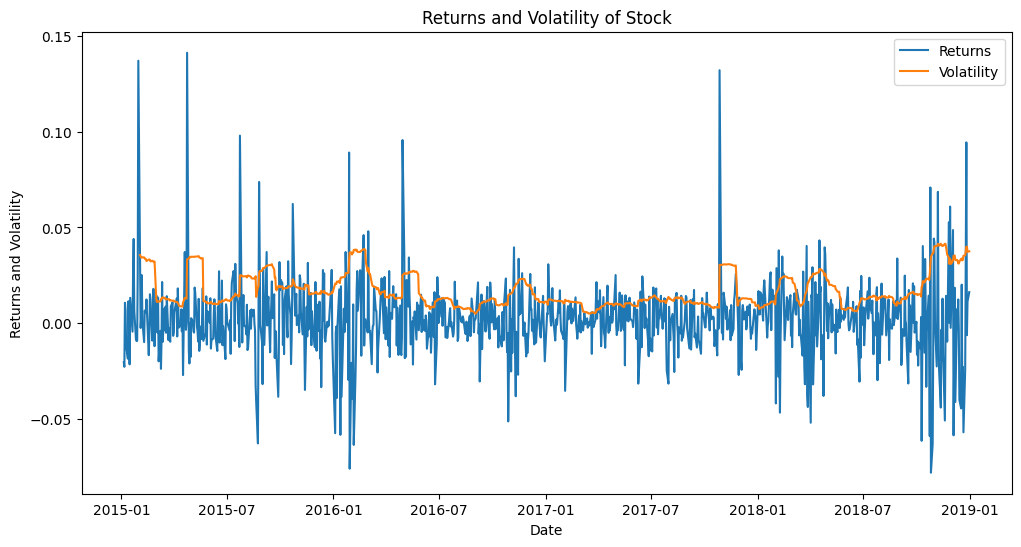

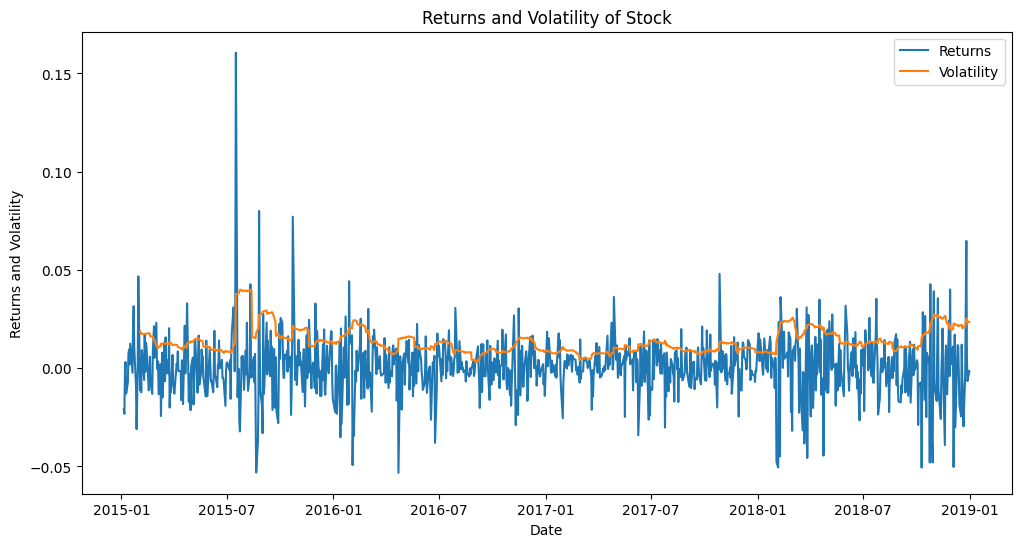

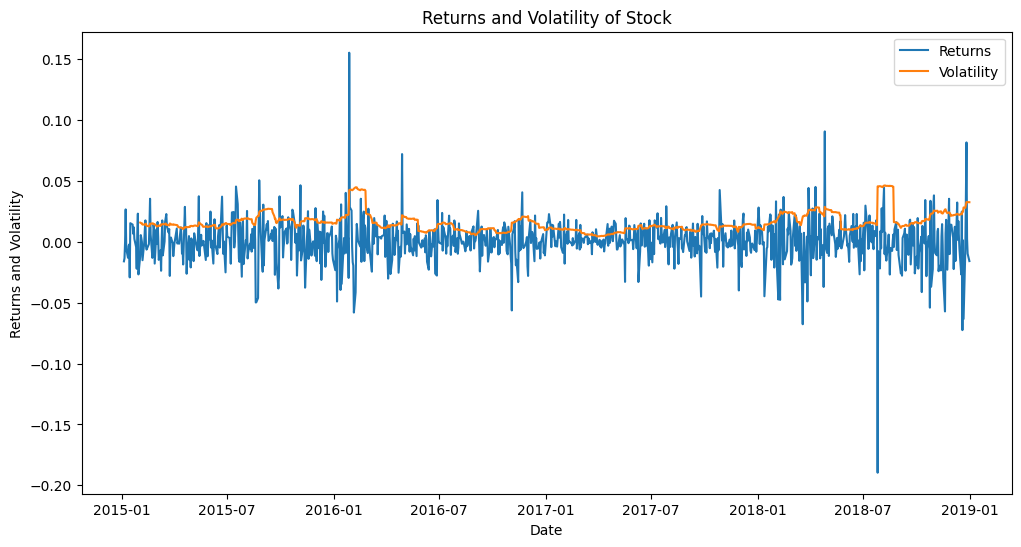

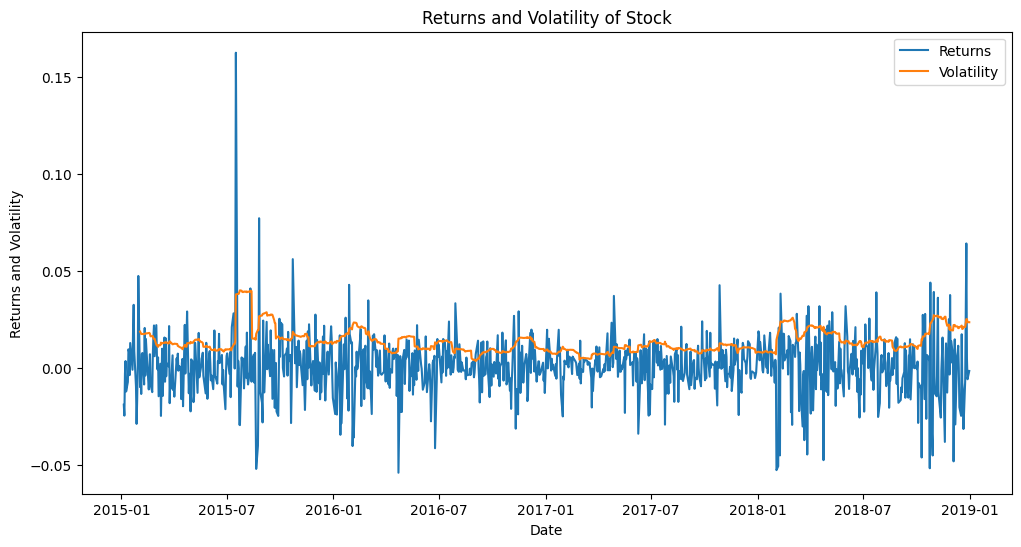

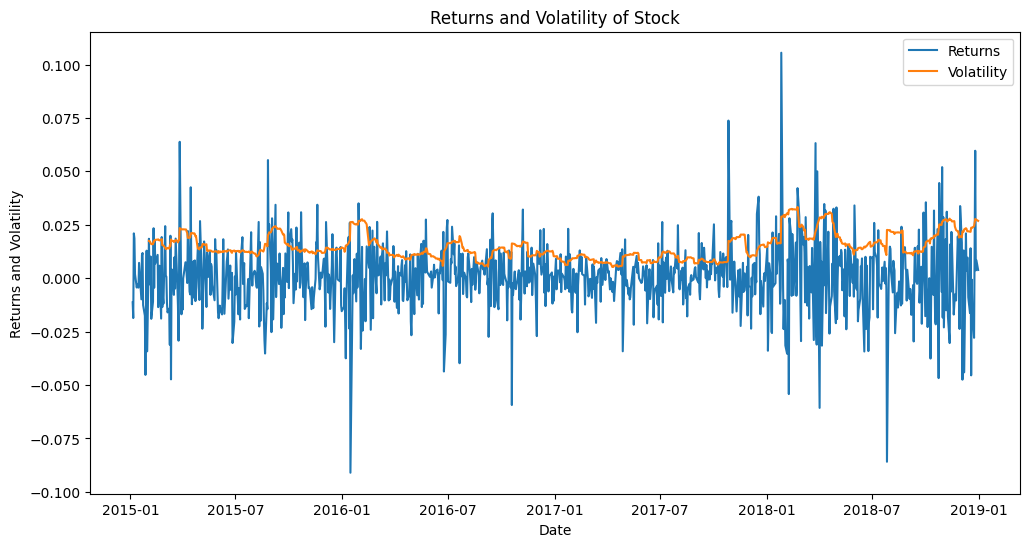

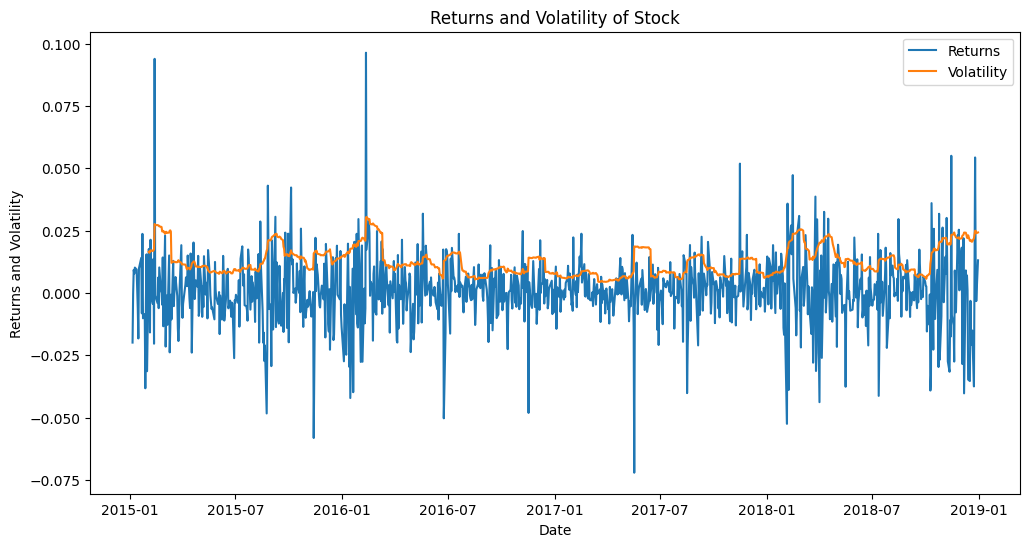

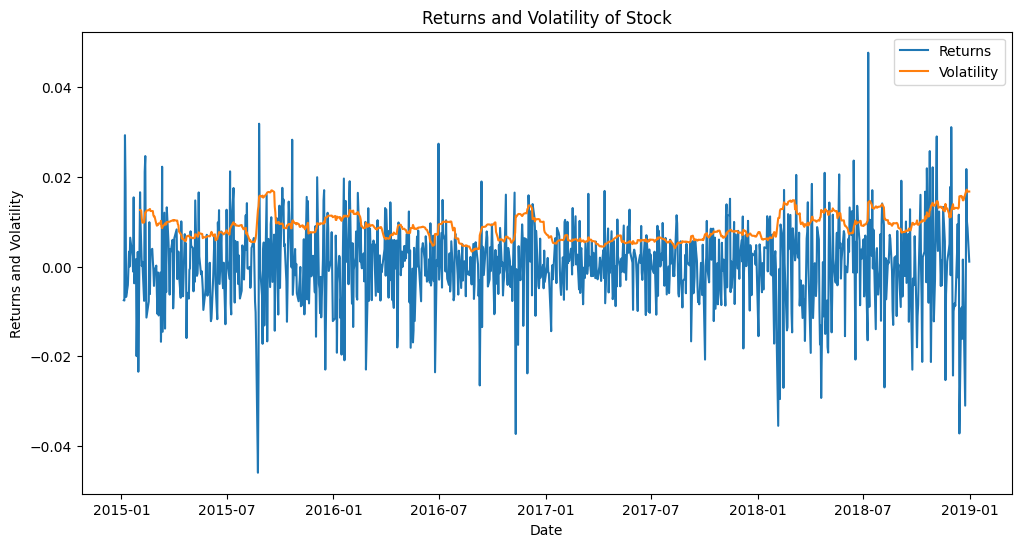

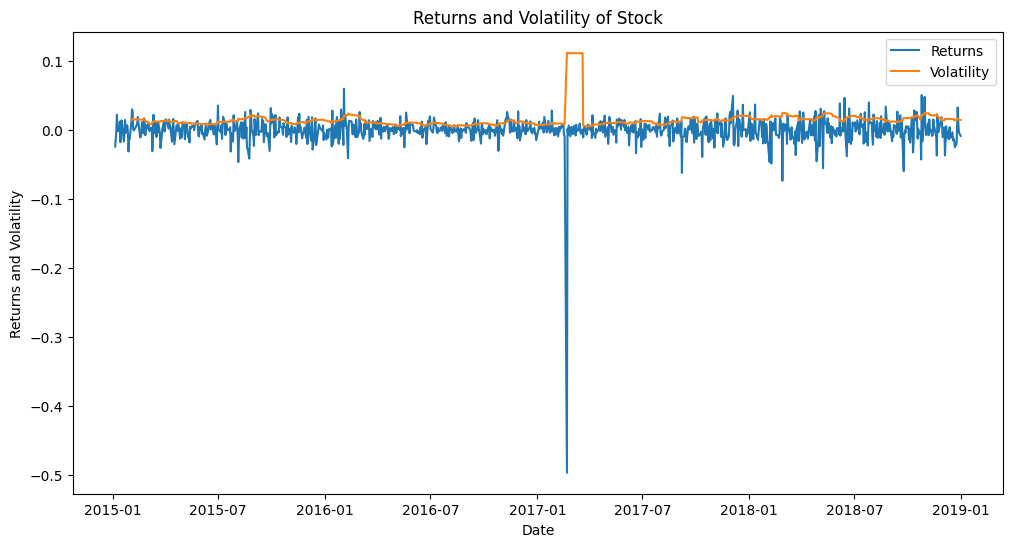

In [ ]:
 for x in range(10):
    df['Returns'] = df[df.columns[x]].pct_change()
    df['Volatility'] = df['Returns'].rolling(window=20).std()
    plt.figure(figsize=(12, 6))  # You can adjust the width and height as needed

    plt.plot(df['Returns'], label='Returns')
    plt.plot(df['Volatility'], label='Volatility')
    plt.legend()
    plt.xlabel('Date')
    plt.ylabel('Returns and Volatility')
    plt.title('Returns and Volatility of Stock')
    plt.show()

In [ ]:
df_filled_with_mean = df.fillna(df.mean())

In [ ]:
df_filled_with_mean

Stock Identifiers  10107.0    14593.0     84788.0     14542.0    13407.0  \
Date                                                                       
2015-01-02          46.760  109.33000   308.51999   524.81000   78.45000   
2015-01-05          46.325  106.25000   302.19000   513.87000   77.19000   
2015-01-06          45.650  106.26000   295.29001   501.95999   76.15000   
2015-01-07          46.230  107.75000   298.42001   501.10001   76.15000   
2015-01-08          47.590  111.89000   300.45999   502.67999   78.17500   
...                    ...        ...         ...         ...        ...   
2018-12-24          94.130  146.83000  1343.95996   976.21997  124.06000   
2018-12-26         100.560  157.17000  1470.90002  1039.45996  134.17999   
2018-12-27         101.180  156.14999  1461.64001  1043.88000  134.52000   
2018-12-28         100.390  156.23000  1478.02002  1037.07996  133.20000   
2018-12-31         101.570  157.74001  1501.96997  1035.60999  131.09000   

Stock Identifiers     90319.0  59328.0  76076.0  13856.0  89525.0  ...  \
Date                                                               ...   
2015-01-02          529.54999    36.36    27.61    94.44    57.35  ...   
2015-01-05          519.46002    35.95    27.06    93.73    55.96  ...   
2015-01-06          506.64001    35.28    27.05    93.02    55.23  ...   
2015-01-07          505.14999    36.02    27.30    95.74    55.18  ...   
2015-01-08          506.91000    36.69    27.51    97.48    56.38  ...   
...                       ...      ...      ...      ...      ...  ...   
2018-12-24          984.66998    43.59    40.28   106.03    33.07  ...   
2018-12-26         1047.84998    46.19    42.47   108.33    34.14  ...   
2018-12-27         1052.90002    46.36    42.91   109.42    34.47  ...   
2018-12-28         1046.68005    46.75    42.77   110.36    34.35  ...   
2018-12-31         1044.95996    46.93    43.33   110.48    34.05  ...   

Stock Identifiers  27684.0  88439.0  78981.0  15065.0  81917.0  79824.0  \
Date                                                                      
2015-01-02           42.80   13.100    72.08    27.48    31.45    29.53   
2015-01-05           42.26   12.660    69.49    33.79    31.37    28.67   
2015-01-06           41.10   12.240    68.81    35.06    31.39    27.73   
2015-01-07           41.36   12.390    68.47    36.23    31.55    27.53   
2015-01-08           42.34   12.580    69.19    35.22    32.10    27.51   
...                    ...      ...      ...      ...      ...      ...   
2018-12-24           34.09   24.440    90.83    40.65    22.66    54.07   
2018-12-26           35.52   26.000    94.12    44.08    23.60    56.03   
2018-12-27           35.76   26.700    94.87    43.78    23.52    56.76   
2018-12-28           35.90   27.470    95.20    44.83    23.83    57.10   
2018-12-31           36.10   27.895    95.67    46.28    23.88    57.69   

Stock Identifiers  90805.0  93179.0   Returns  Volatility  
Date                                                       
2015-01-02           34.48    31.66 -0.000236    0.015027  
2015-01-05           33.06    30.81 -0.024237    0.015027  
2015-01-06           31.98    31.26 -0.013045    0.015027  
2015-01-07           32.21    32.12 -0.000905    0.015027  
2015-01-08           32.47    33.12  0.021747    0.015027  
...                    ...      ...       ...         ...  
2018-12-24           24.47    15.17 -0.020148    0.014176  
2018-12-26           25.55    15.52  0.032356    0.016230  
2018-12-27           24.78    15.59  0.009666    0.015884  
2018-12-28           24.64    15.59 -0.003481    0.014908  
2018-12-31           24.74    15.51 -0.008734    0.014459  

[1006 rows x 302 columns]

In [ ]:
correlation = df['Returns'].corr(df['Volatility'])
print(f"Correlation between Returns and Volatility: {correlation}")


Correlation between Returns and Volatility: -0.16993248870077063


In [ ]:
correlation_spearman = df['Returns'].corr(df['Volatility'], method='spearman')
print(f"Spearman Rank Correlation between column1 and column2: {correlation_spearman}")

Spearman Rank Correlation between column1 and column2: -0.01268033347384078


**Observation:** From the plots obtained it is quite clear that the return and volatility don't follow each other and somewhere tend to be opposite, also the correlation is very low which also justify the arguement of Leverage effect i.e.
when the returns of an asset go down, its volatility tends to go up, and vice versa.

10**.  Volume/volatility correlation:** It  refers to the observation that trading volume in financial markets is correlated with various measures of volatility. In simpler terms, when there's a significant increase in trading activity (volume), it tends to coincide with higher levels of price volatility. We don't have volume data so can't implement this for now but for general dataset the implementation is in the definition it self just we have to find and statistically verify it.

**11. Assymetry in Time scales:**  It means volatility (measures calculated over longer time horizons) are often better at predicting fine-scale volatility (measures calculated over shorter time horizons).

In [ ]:
df=pd.read_excel("Dataset.xlsx")

In [ ]:
df.head()

Unnamed: 0.1  Unnamed: 0   20150102  20150105   20150106   20150107  \
0             0       10107   46.76000    46.325   45.65000   46.23000   
1             1       14593  109.33000   106.250  106.26000  107.75000   
2             2       84788  308.51999   302.190  295.29001  298.42001   
3             3       14542  524.81000   513.870  501.95999  501.10001   
4             4       13407   78.45000    77.190   76.15000   76.15000   

    20150108   20150109   20150112   20150113  ...    20181217    20181218  \
0   47.59000   47.19000   46.60000   46.35500  ...   102.89000   103.97000   
1  111.89000  112.01000  109.25000  110.22000  ...   163.94000   166.07001   
2  300.45999  296.92999  291.41000  294.73999  ...  1520.91003  1551.47998   
3  502.67999  496.17001  492.54999  496.17999  ...  1016.53003  1028.70996   
4   78.17500   77.74000   76.72000   76.45000  ...   140.19000   143.66000   

     20181219    20181220    20181221    20181224    20181226    20181227  \
0   103.69000   101.51000    98.23000    94.13000   100.56000   101.18000   
1   160.89000   156.83000   150.73000   146.83000   157.17000   156.14999   
2  1495.07996  1460.82996  1377.44995  1343.95996  1470.90002  1461.64001   
3  1023.01001  1009.40997   979.53998   976.21997  1039.45996  1043.88000   
4   133.24001   133.39999   124.95000   124.06000   134.17999   134.52000   

     20181228    20181231  
0   100.39000   101.57000  
1   156.23000   157.74001  
2  1478.02002  1501.96997  
3  1037.07996  1035.60999  
4   133.20000   131.09000  

[5 rows x 1008 columns]

In [ ]:
data=pd.DataFrame(columns=["Daily Returns","Monthly Returns"])
data["Close"]=df.iloc[0,2:]
for i in range(1,len(df.columns)-2):
    data.iloc[i,0]=((df.iloc[0,2+i]-df.iloc[0,i+1])/df.iloc[0,i+1])*100
for i in range(1,len(df.columns)-31):
    data.iloc[i,1]=((df.iloc[0,31+i]-df.iloc[0,i+1])/df.iloc[0,i+1])*100
data

Daily Returns Monthly Returns    Close
20150102           NaN             NaN   46.760
20150105     -0.930282       -6.800684   46.325
20150106     -1.457097       -6.033459   45.650
20150107      1.270537       -4.709748   46.230
20150108      2.941813       -5.137357   47.590
...                ...             ...      ...
20181224     -4.173878             NaN   94.130
20181226      6.830978             NaN  100.560
20181227      0.616547             NaN  101.180
20181228     -0.780787             NaN  100.390
20181231      1.175416             NaN  101.570

[1006 rows x 3 columns]

In [ ]:
data["Daily Returns"] = pd.to_numeric(data["Daily Returns"], errors="coerce")
data["Monthly Returns"] = pd.to_numeric(data["Monthly Returns"], errors="coerce")
daily_returns = data["Daily Returns"].values
monthly_returns = data["Monthly Returns"].values

In [ ]:
daily_returns = daily_returns[~np.isnan(daily_returns)]
monthly_returns = monthly_returns[~np.isnan(monthly_returns)]
daily_std = np.std(daily_returns)
monthly_std = np.std(monthly_returns)

daily_std, monthly_std

(1.5193119186164057, 6.284228544431417)

Calculating the correlation coeffecient of the monthly and daily returns.
The correlation coeffecient has been calculated by finding the covariance of the monthly and daily returns and then by dividing it by the standard deviation of both monthly and daily returns which was previously calculated

In [ ]:
daily_returns = daily_returns[:976]
monthly_returns = monthly_returns[:976]
covariance = np.cov(daily_returns, monthly_returns)
corr_coef=covariance[0,1]/(daily_std*monthly_std)
corr_coef

0.17119188861048817

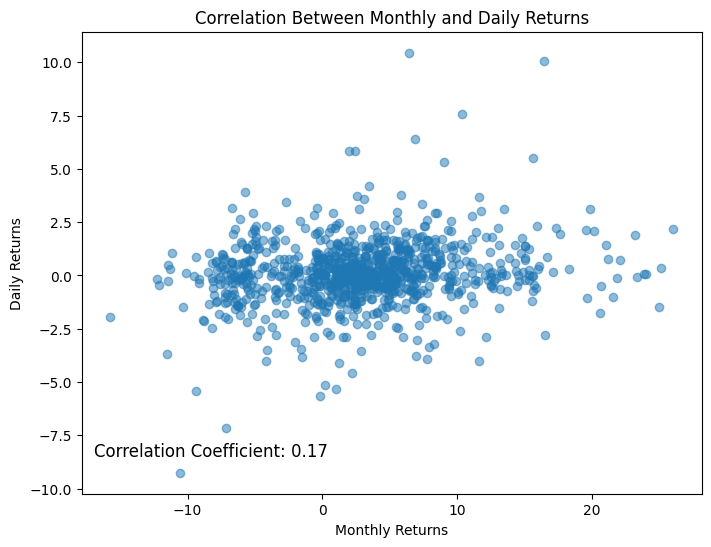

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(monthly_returns, daily_returns, alpha=0.5)
plt.title("Correlation Between Monthly and Daily Returns")
plt.xlabel("Monthly Returns")
plt.ylabel("Daily Returns")
plt.text(0.02, 0.08, f"Correlation Coefficient: {corr_coef:.2f}", fontsize=12, transform=plt.gca().transAxes)

plt.show()


The previous calculation were done for the first data(stock) in the dataset. Now we calculate the correlation coeffecient of monthly and daily returns for all the stocks in the dataset using the same methodology and analyse them

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
data = pd.DataFrame(columns=["Daily Returns", "Monthly Returns"])
data["Close"] = df.iloc[0, 2:]


corr_coef_list = []

for i in range(1, len(df)):
    daily_returns = []
    monthly_returns = []
    for j in range(1, len(df.columns) - 2):
        daily_returns.append(((df.iloc[i, 2 + j] - df.iloc[i, j + 1]) / df.iloc[i, j + 1]) * 100)
    for j in range(1, len(df.columns) - 31):
        monthly_returns.append(((df.iloc[i, 31 + j] - df.iloc[i, j + 1]) / df.iloc[i, j + 1]) * 100)

    daily_returns = daily_returns[:976]
    monthly_returns = monthly_returns[:976]

    row_data = pd.DataFrame({"Daily Returns": daily_returns, "Monthly Returns": monthly_returns})


    row_data["Daily Returns"] = pd.to_numeric(row_data["Daily Returns"], errors="coerce")
    row_data["Monthly Returns"] = pd.to_numeric(row_data["Monthly Returns"], errors="coerce")

    row_data = row_data.dropna()

    daily_returns = row_data["Daily Returns"].values
    monthly_returns = row_data["Monthly Returns"].values

    daily_std = np.std(daily_returns)
    monthly_std = np.std(monthly_returns)
    covariance = np.cov(daily_returns, monthly_returns)


    corr_coef = covariance[0, 1] / (daily_std * monthly_std)


    corr_coef_list.append(corr_coef)

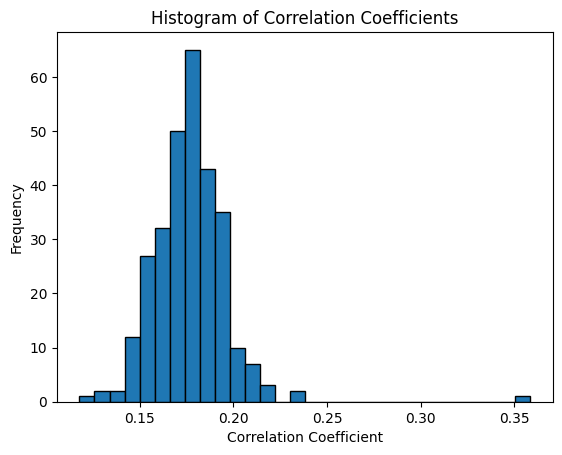

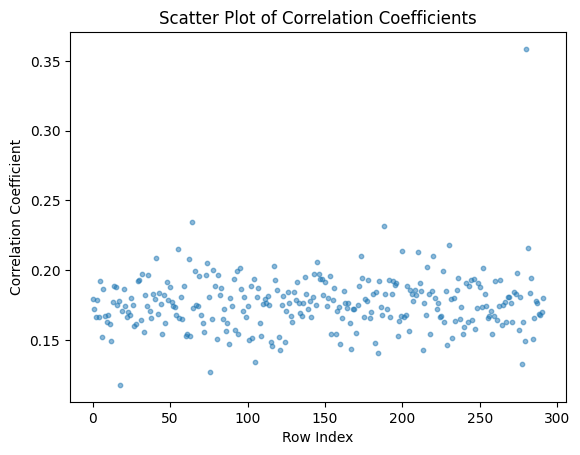

Mean: 0.1764491675558522
Median: 0.17599174947777368
Standard Deviation: 0.019999328412821257
Minimum: 0.11781301586293838
Maximum: 0.35856294624350754


In [ ]:
corr_coef_list = [x for x in corr_coef_list if not np.isnan(x)]

plt.hist(corr_coef_list, bins=30, edgecolor='k')
plt.xlabel("Correlation Coefficient")
plt.ylabel("Frequency")
plt.title("Histogram of Correlation Coefficients")
plt.show()
plt.scatter(range(len(corr_coef_list)), corr_coef_list, s=10, marker='o', alpha=0.5)
plt.xlabel("Row Index")
plt.ylabel("Correlation Coefficient")
plt.title("Scatter Plot of Correlation Coefficients")
plt.show()

mean_corr = np.mean(corr_coef_list)
median_corr = np.median(corr_coef_list)
std_corr = np.std(corr_coef_list)
min_corr = np.min(corr_coef_list)
max_corr = np.max(corr_coef_list)

print(f"Mean: {mean_corr}")
print(f"Median: {median_corr}")
print(f"Standard Deviation: {std_corr}")
print(f"Minimum: {min_corr}")
print(f"Maximum: {max_corr}")


From this data, the mean correlation coeffecient is 0.176, this shows a mild positive correlation between monthly and daily returns showing that coarse-grained(monthly) volatility is a much better at predicting fine grained(daily) volatility than the other way around.

# **Conclusion**: Despite having a smaller dataset we observed that more or less all the stylized facts were still applicable on the data and it was really interesting to have a statistical view on them and understanding them in detail.